In [1]:
import pandas as pd
import pyarrow.feather as feather
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import requests
from sklearn.manifold import TSNE

from src.load_data import *
from src.graph_data import *
from src.utils import *
from src.scripts import *

['/Users/finnweikert/opt/anaconda3/envs/ADAproj/lib/python311.zip', '/Users/finnweikert/opt/anaconda3/envs/ADAproj/lib/python3.11', '/Users/finnweikert/opt/anaconda3/envs/ADAproj/lib/python3.11/lib-dynload', '', '/Users/finnweikert/opt/anaconda3/envs/ADAproj/lib/python3.11/site-packages', '/Users/finnweikert/Desktop/Ada', '/Users/finnweikert/Desktop/Ada']
---- WARNING: The following articles have a problem: ----
Badugi has no links (out-edges) listed.
Color_Graphics_Adapter has no links (out-edges) listed.
Directdebit has no category listed.
Directdebit has no links (out-edges) listed.
Donation has no category listed.
Donation has no links (out-edges) listed.
Douglas_DC-4 has no links (out-edges) listed.
Duchenne_muscular_dystrophy has no links (out-edges) listed.
Friend_Directdebit has no category listed.
Klinefelter%27s_syndrome has no links (out-edges) listed.
Local_community has no links (out-edges) listed.
Lone_Wolf_%28gamebooks%29 has no links (out-edges) listed.
Osteomalacia has

In [2]:
# new import list (add all needed imports here not)
import os
import pyarrow.feather as feather
from src.scripts.load_data import load_data
from src.scripts.convert_into_df import paths_to_df, articles_to_df
from src.scripts.path_processing import filter_paths
from src.scripts.backup_dfs import backup_dataframes
from src.utils.helpers import plot_path_length_distributions, plot_by_distance, plot_duration_histogram, plot_styled_bar_chart

In [3]:
#%pip install -r requirements.txt

# Part 0 : Data Handling 

## Load and Convert Data into Dataframes
 Here, we have rearranged the data making it easier to work with. We have split the data up into two data frames described as follows :  
 **Need to explain what each col stands for**


## Article DF
| Article | Category |linkTargets | Article_id | distances | plain_text | 
| ------- | ---------- | ------------ | ---------- | ---------- | ---------- |
| string | string | list[string] | string | dict[string, int] | string | 


## Path DF
| hashedIpAddress | timestamp   | durationInSec | identifier | full_path    | simplified_path | full_path_length | simplified_path_length | distance |  
|------------------|------------|---------------|------------|--------------|-----------------|------------------|-----------------------|----------|  
| string           | int        | int           | string     | list[string] | list[string]    | int              | int                   | int      |  

**Column Explanations**  
`hashedIpAdress`: identifies the computer from wich the game was played. We assume same IpAdress => same player.  
`timestamp`: game time stamp  
`durationInSec`: the time in seconds it took to play the path  
`identifier`: identifier for games that have the same start and target article pair  
`full_path`: path with all visited articles  
`simplified_path`: direct path excluding detour articles  
`distance`: the shortes possible distance from start to target article  



In [4]:
# If the data has not already been loaded
if not os.path.exists('Data/dataframes/article_dataframe.feather'):
    print('Loading data...')
    articles, categories, links, paths_finished, paths_unfinished, distances = load_data()
    print('Converting the data into dataframes...')
    # article dataframe
    article_df = articles_to_df(articles, categories, links, distances)
    # paths dataframe
    paths_df = paths_to_df(paths_finished, paths_unfinished, article_df)
    # save dataframes
    article_df.to_feather('Data/dataframes/article_dataframe.feather')
    paths_df.to_feather('Data/dataframes/paths.feather')
else:
    print('Data already converted into dataframes, load stored dataframes...')
    article_df = feather.read_feather('Data/dataframes/article_dataframe.feather')
    paths_df = feather.read_feather('Data/dataframes/paths.feather')

Data already converted into dataframes, load stored dataframes...


In [5]:
article_df

,article,category,linkTarget,distances,plain_text
0,Áedán_mac_Gabráin,[subject.History.British_History.British_Histo...,"[Bede, Columba, Dál_Riata, Great_Britain, Irel...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nÁedán mac Gabráin\n\n2007 Sch...
1,Åland,"[subject.Countries, subject.Geography.European...","[20th_century, Baltic_Sea, Crimean_War, Curren...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nÅland\n\n2007 Schools Wikiped...
2,Édouard_Manet,[subject.People.Artists],"[Absinthe, Beer, Claude_Monet, Diego_Velázquez...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nÉdouard Manet\n\n2007 Schools...
3,Éire,"[subject.Countries, subject.Geography.European...","[Canada, English_language, George_VI_of_the_Un...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nÉire\n\n2007 Schools Wikipedi...
4,Óengus_I_of_the_Picts,[subject.History.British_History.British_Histo...,"[Dál_Riata, Durham, England, Great_Britain, Ir...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nÓengus I of the Picts\n\n2007...
...,...,...,...,...,...
4599,Zionism,"[subject.People.Political_People, subject.Reli...","[18th_century, 19th_century, Adolf_Hitler, Alb...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nZionism\n\n2007 Schools Wikip...
4600,Zirconium,[subject.Science.Chemistry.Chemical_elements],"[Aluminium, Arabic_language, Australia, Bicycl...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nZirconium\n\n2007 Schools Wik...
4601,Zoroaster,[subject.People.Religious_figures_and_leaders],"[18th_century, 9th_century, Afghanistan, Age_o...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nZoroaster\n\n2007 Schools Wik...
4602,Zuid-Gelders,"[subject.Geography.European_Geography, subject...","[Brabantian, Dutch_language, East_Flemish, Hol...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nZuid-Gelders\n\n2007 Schools ...


In [6]:
paths_df

,hashedIpAddress,timestamp,durationInSec,path,rating,finished,failure_reason,start_article,target_article,identifier,full_path,simplified_path,distance,full_path_length,simplified_path_length
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN,True,None,14th_century,African_slave_trade,48,"[14th_century, 15th_century, 16th_century, Pac...","[14th_century, 15th_century, 16th_century, Pac...",3.0,8,8
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,True,None,14th_century,African_slave_trade,48,"[14th_century, Europe, Africa, Atlantic_slave_...","[14th_century, Europe, Africa, Atlantic_slave_...",3.0,4,4
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,True,None,14th_century,African_slave_trade,48,"[14th_century, Niger, Nigeria, British_Empire,...","[14th_century, Niger, Nigeria, British_Empire,...",3.0,7,7
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,True,None,14th_century,Greece,52,"[14th_century, Renaissance, Ancient_Greece, Gr...","[14th_century, Renaissance, Ancient_Greece, Gr...",2.0,3,3
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,True,None,14th_century,John_F._Kennedy,56,"[14th_century, Italy, Roman_Catholic_Church, H...","[14th_century, Italy, Roman_Catholic_Church, H...",3.0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76188,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,NaN,False,restart,Franz_Kafka,Cholera,15039,"[Franz_Kafka, Tuberculosis, World_Health_Organ...","[Franz_Kafka, Tuberculosis, World_Health_Organ...",3.0,6,5
76189,232f992e57d43e8d,1389787697,6,Modern_history,NaN,False,restart,Modern_history,Hollandic,25796,[Modern_history],[Modern_history],3.0,0,0
76190,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,NaN,False,timeout,Computer_programming,The_Beatles,9818,"[Computer_programming, Linguistics, Culture, P...","[Computer_programming, Linguistics, Culture]",3.0,3,2
76191,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,NaN,False,timeout,Jamaica,Alan_Turing,20569,"[Jamaica, United_Kingdom, World_War_II, Battle...","[Jamaica, United_Kingdom, World_War_II, Battle...",3.0,3,3


# Part 1 : Processing and Analysis of Played Paths

The played path data is in subsequent parts used for article scoring, where the score needs to capture articles 'quality' for players in the game. Therefore, it is essential that prior path data pre-processing is performed.  

## 1.1 Outlier Handling

Since we will be interested in path length and time taken to compute article scores, we need to perform outlier filtering on these columns of our path data frame. This will be done on **finished** and **unfinished paths** separately.

#### Finished Path Filtering

1. **Downsampling to One Path per Player per Identifier**:
    - First we downsample the data so that each start-target article pair can only have been played by a player once (downsample to one `hashedIpAddress`, `identifier` pair). This ensures that we don't consider all the paths that have been learned by players through mulitple attemps.

2. **Downsampling Same Start-Target Pairs**:
    - By ensuring that the same start-target pair does not appear more than a specified number of times (we set to 5), we make sure that certain paths are not overrepresented. In fact, we have observed that while most start-target pairs are only present once, in some cases they have been played around 1000 times.

3. **Remove Paths with distance=0 (same start and target article)**:
    - We noticed that a few samples have distance 0, these also need to be removed.

4. **Outlier Removal with the IQR Method**:  
      
    **For Path Length**
    - The **IQR method** is applied to filter out paths based on **full path length**. The IQR is calculated for each distance group, and any paths outside the range of `[Q1 - multiplier * IQR, Q3 + multiplier * IQR]` are considered outliers and removed. The distance goup is the group af paths that have the same `distance` value i.e can reach their target in the same minimal number of clicks. We filter seperately for each distance group as, these groups will obviously have different statistics.

    **For Path Time**  
    - Since **duration** is relevant only for finished paths, the IQR method is applied to filter out paths based on their **duration**. Paths with durations greater than the calculated upper bound (`Q3 + 1.5 * IQR`) are removed, again seperately for each distance goup.


#### Unfinished Path Filtering

1. **Removing Unnecessary Failures**:
    - First we remove paths where the player did not actively fail the path (i.e., `failure_reason != 'timeout'`). Only paths where the player made an active decision to stop the path are considered. While not conservative, this is a first indicator that the user actually tried.

2. **Filtering Path Length Using the IQR Method**:
    - Similar to the finished paths, the IQR method is applied to filter out **unfinished paths** based on **full path length**. The upper bound for the full path length is determined by the IQR, and any paths that exceed this value are removed.

3. **Simplified Path Length Check**:
    - Additionally, the function ensures that the **simplified path length** is greater than or equal to the **distance**. This condition helps remove paths where the simplified path length is implausibly shorter than the actual distance.


Before calling the filtering function that do what is explained above, let's look at the data prior to filtering.  
First we consider the **Path Length** statistics.
The Very large max values indicates that outlier removal is deinetly required.

In [7]:
finished_paths = paths_df[paths_df['finished']]
unfinished_paths = paths_df[~paths_df['finished']]

print(f"Finished path length statistics:\n    {finished_paths[['full_path_length', 'simplified_path_length']].describe()}\n")
print(f"Unfinished path length statistics:\n    {unfinished_paths[['full_path_length', 'simplified_path_length']].describe()}\n")

Finished path length statistics:
           full_path_length  simplified_path_length
count      51318.000000            51318.000000
mean           5.356775                4.956117
std            3.775778                3.288758
min            0.000000                0.000000
25%            3.000000                3.000000
50%            5.000000                4.000000
75%            6.000000                6.000000
max          419.000000              404.000000

Unfinished path length statistics:
           full_path_length  simplified_path_length
count      24875.000000            24875.000000
mean           3.678915                3.160040
std            4.595089                3.942539
min            0.000000                0.000000
25%            1.000000                1.000000
50%            3.000000                2.000000
75%            5.000000                4.000000
max          191.000000              148.000000



And for the **duration** statistics. Again the very large max value indicates that outlier handling is needed.


In [8]:
print(f"Finished path duration statistics:\n    {finished_paths[['durationInSec']].describe()}\n")

Finished path duration statistics:
           durationInSec
count   51318.000000
mean      158.276199
std       360.841904
min         0.000000
25%        60.000000
50%       107.000000
75%       183.000000
max     35091.000000



In [9]:
length_filt_finished_paths, filt_unfinished_paths, time_filt_finished_paths = filter_paths(paths_df)

--------------------------------------------------
In path length filtering a total of 27145 paths were removed from the finished paths, which represents 52.907% of the original finished data.  21646 paths remain.
--------------------------------------------------
In path length filtering a total of 18144 paths were removed from the unfinished paths, which represents 72.941% of the original unfinished data.  6012 paths remain.
--------------------------------------------------
In path time filtering a total of 27293 paths were removed from the finished paths, which represents 53.195% of the original finished data.  21498 paths remain.
--------------------------------------------------


**storing can maybe removed in final version**

In [10]:
# store the filtered dataframes as feather files
length_filt_finished_paths.to_feather('Data/dataframes/length_filt_finished_paths.feather')
time_filt_finished_paths.to_feather('Data/dataframes/time_filt_finished_paths.feather')
filt_unfinished_paths.to_feather('Data/dataframes/filt_unfinished_paths.feather')

## 1.2 Analysis of the path distributions

We will do so starting with the **finished paths**. where the goal is to get a histogram of the path lengths.

We will visualize histograms for:
 1. **Path length** distribution 
 2. **Path duration** distribution

Prior to filtering:


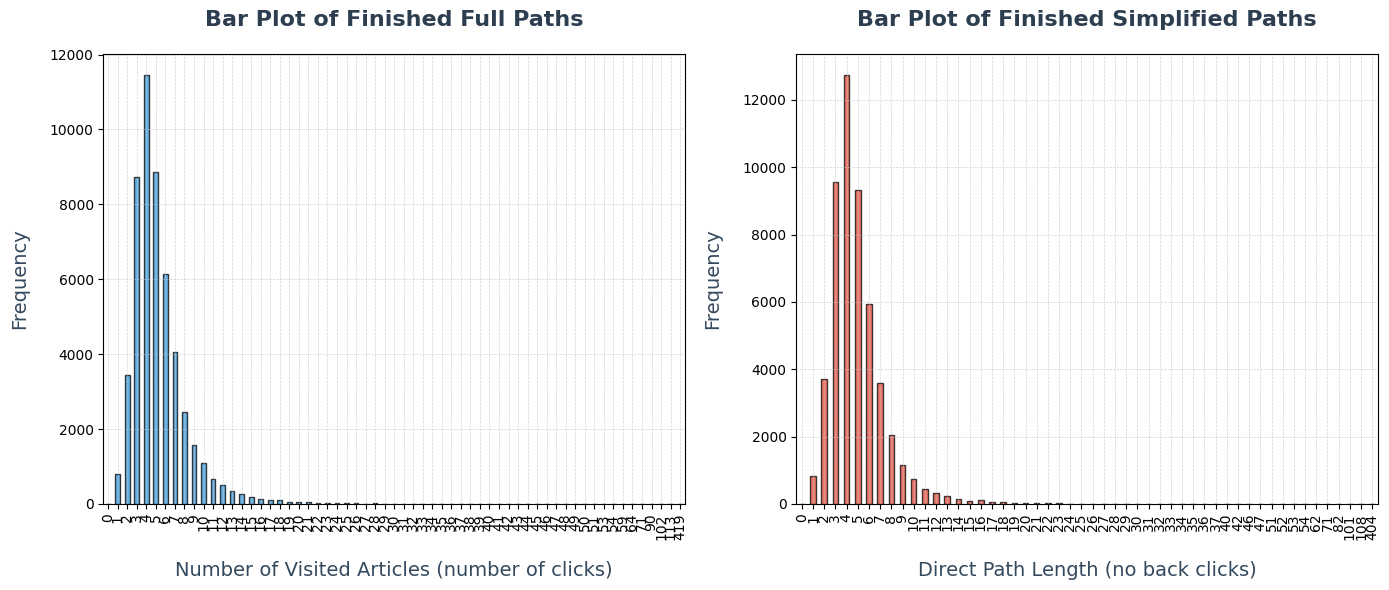

After filtering:


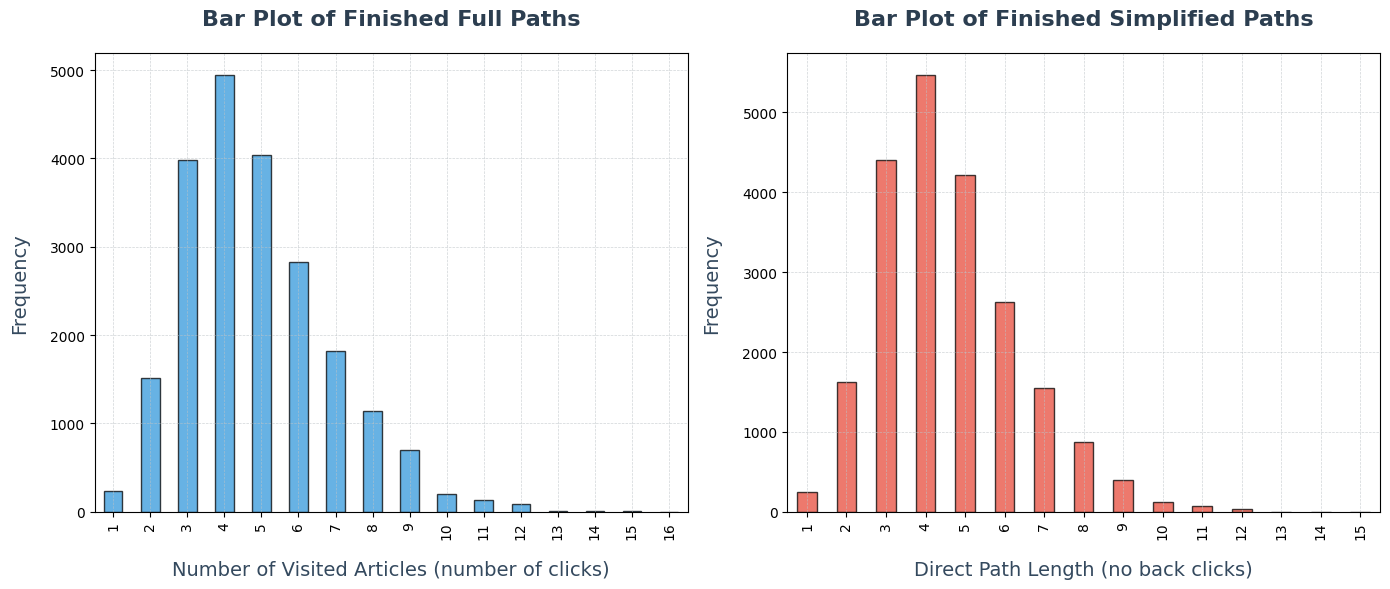

In [11]:
# Plot the histograms for full path and simpliefied path lengths prior to filtering
print("Prior to filtering:")
plot_path_length_distributions(finished_paths)

# And post filtering
print("After filtering:")
plot_path_length_distributions(length_filt_finished_paths)



This looks pretty good! While it may appear that the upper cutoff threshold is a bit large, this is simply due to these plots looking at the global path length distributions, while we filter for each distance group individually. And since these groups are distributed differently, we will keep some sample with longer paths.  
Below the distance group distribtions are plotted. 

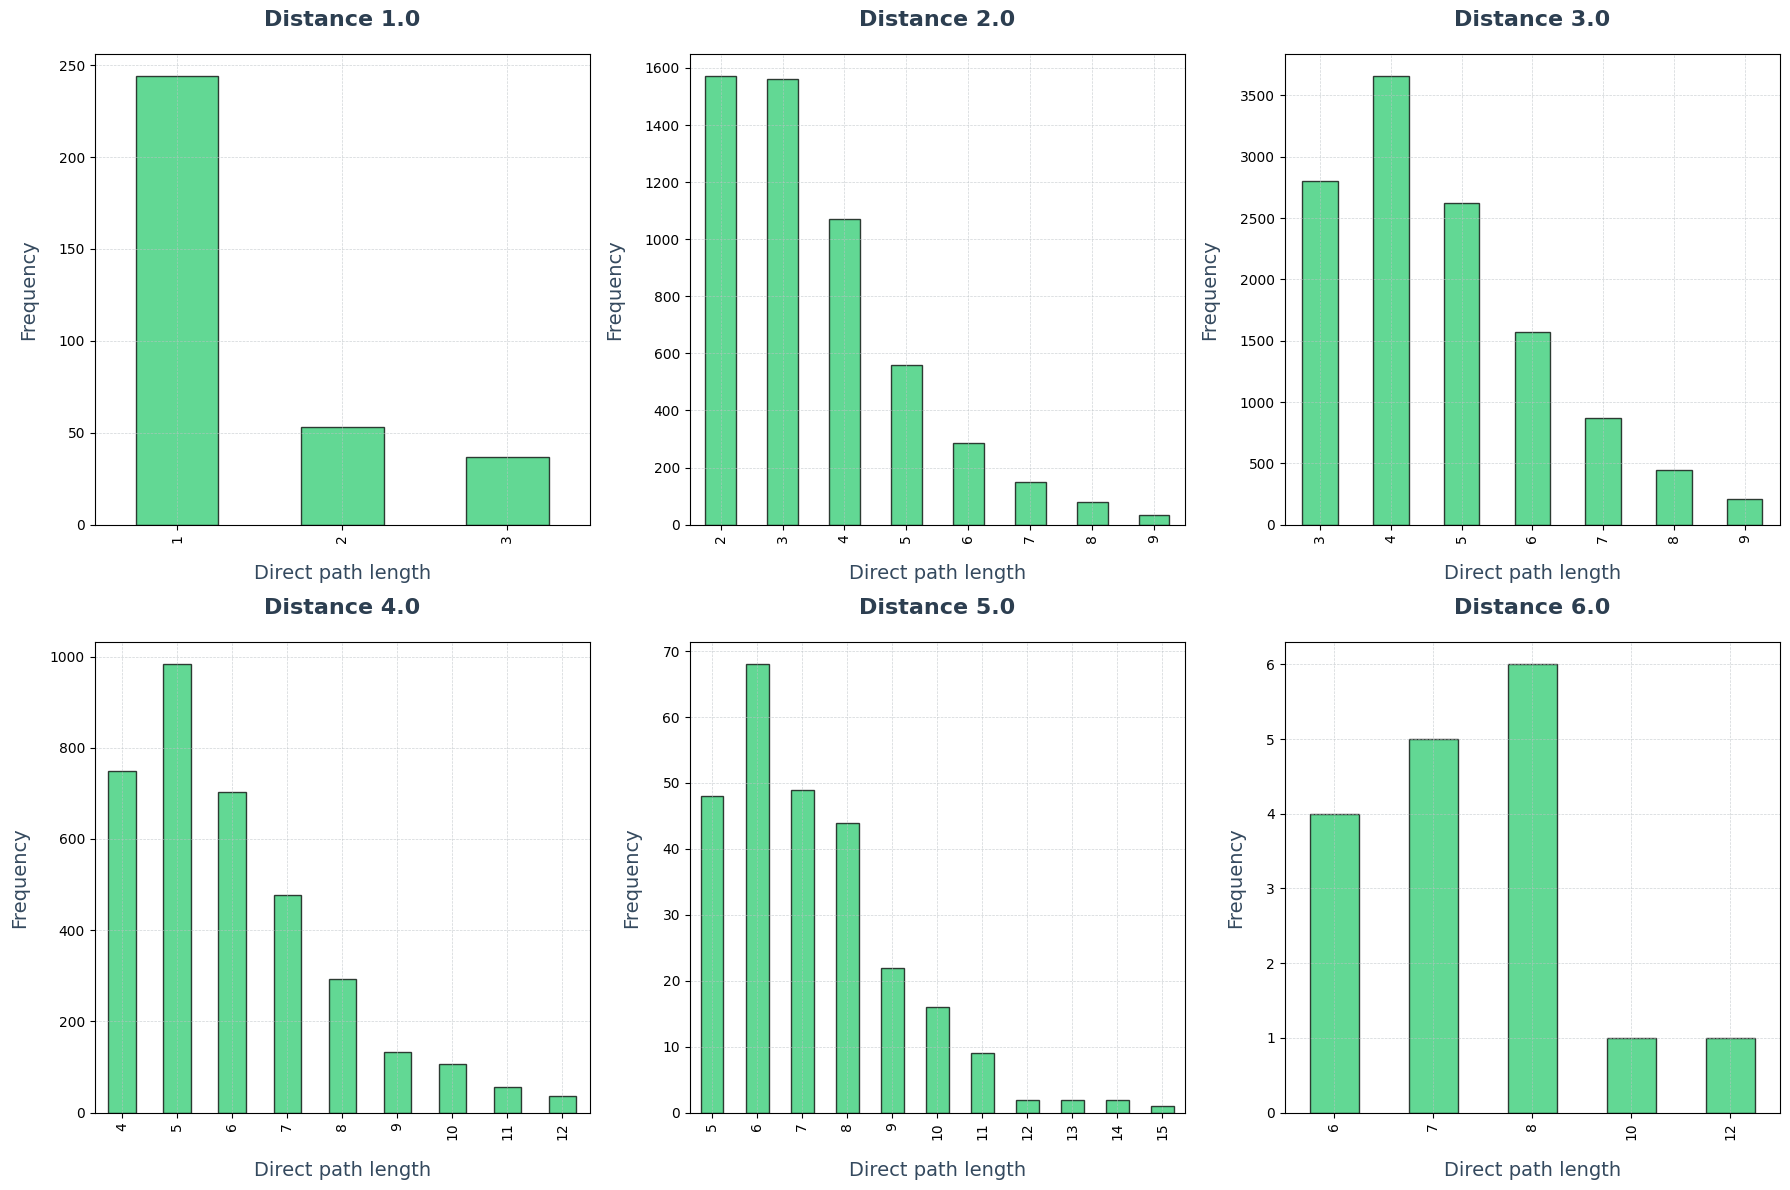

In [12]:
plot_by_distance(length_filt_finished_paths, 'simplified_path_length', x_label='Direct path length')

And now for the duration filtered finished paths...

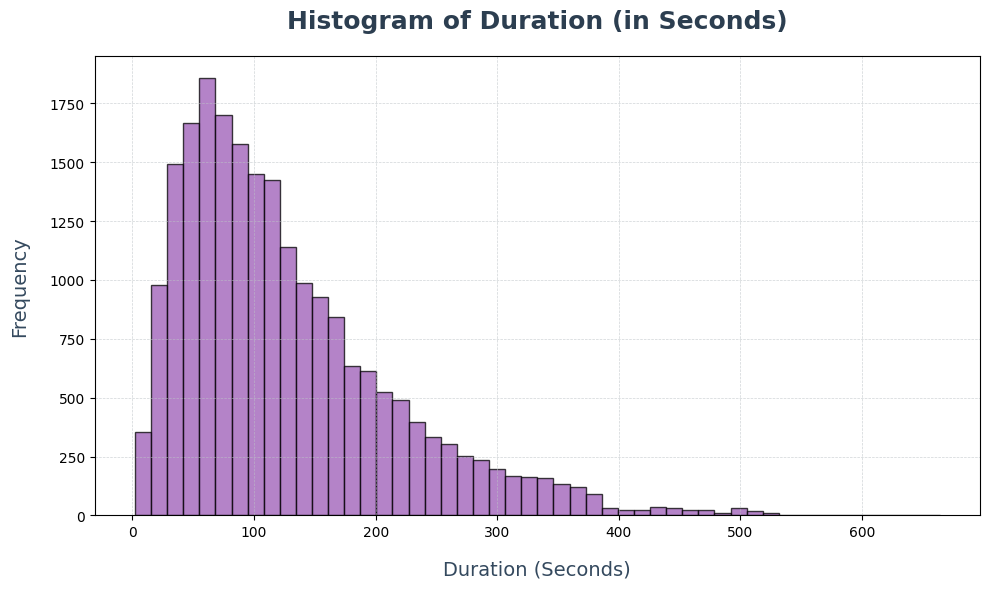

In [13]:
plot_duration_histogram(time_filt_finished_paths, bins=50)

Again the distribution has a long tail which is due to the seperate IQR filtering for the different distance groups. The plots below show this.

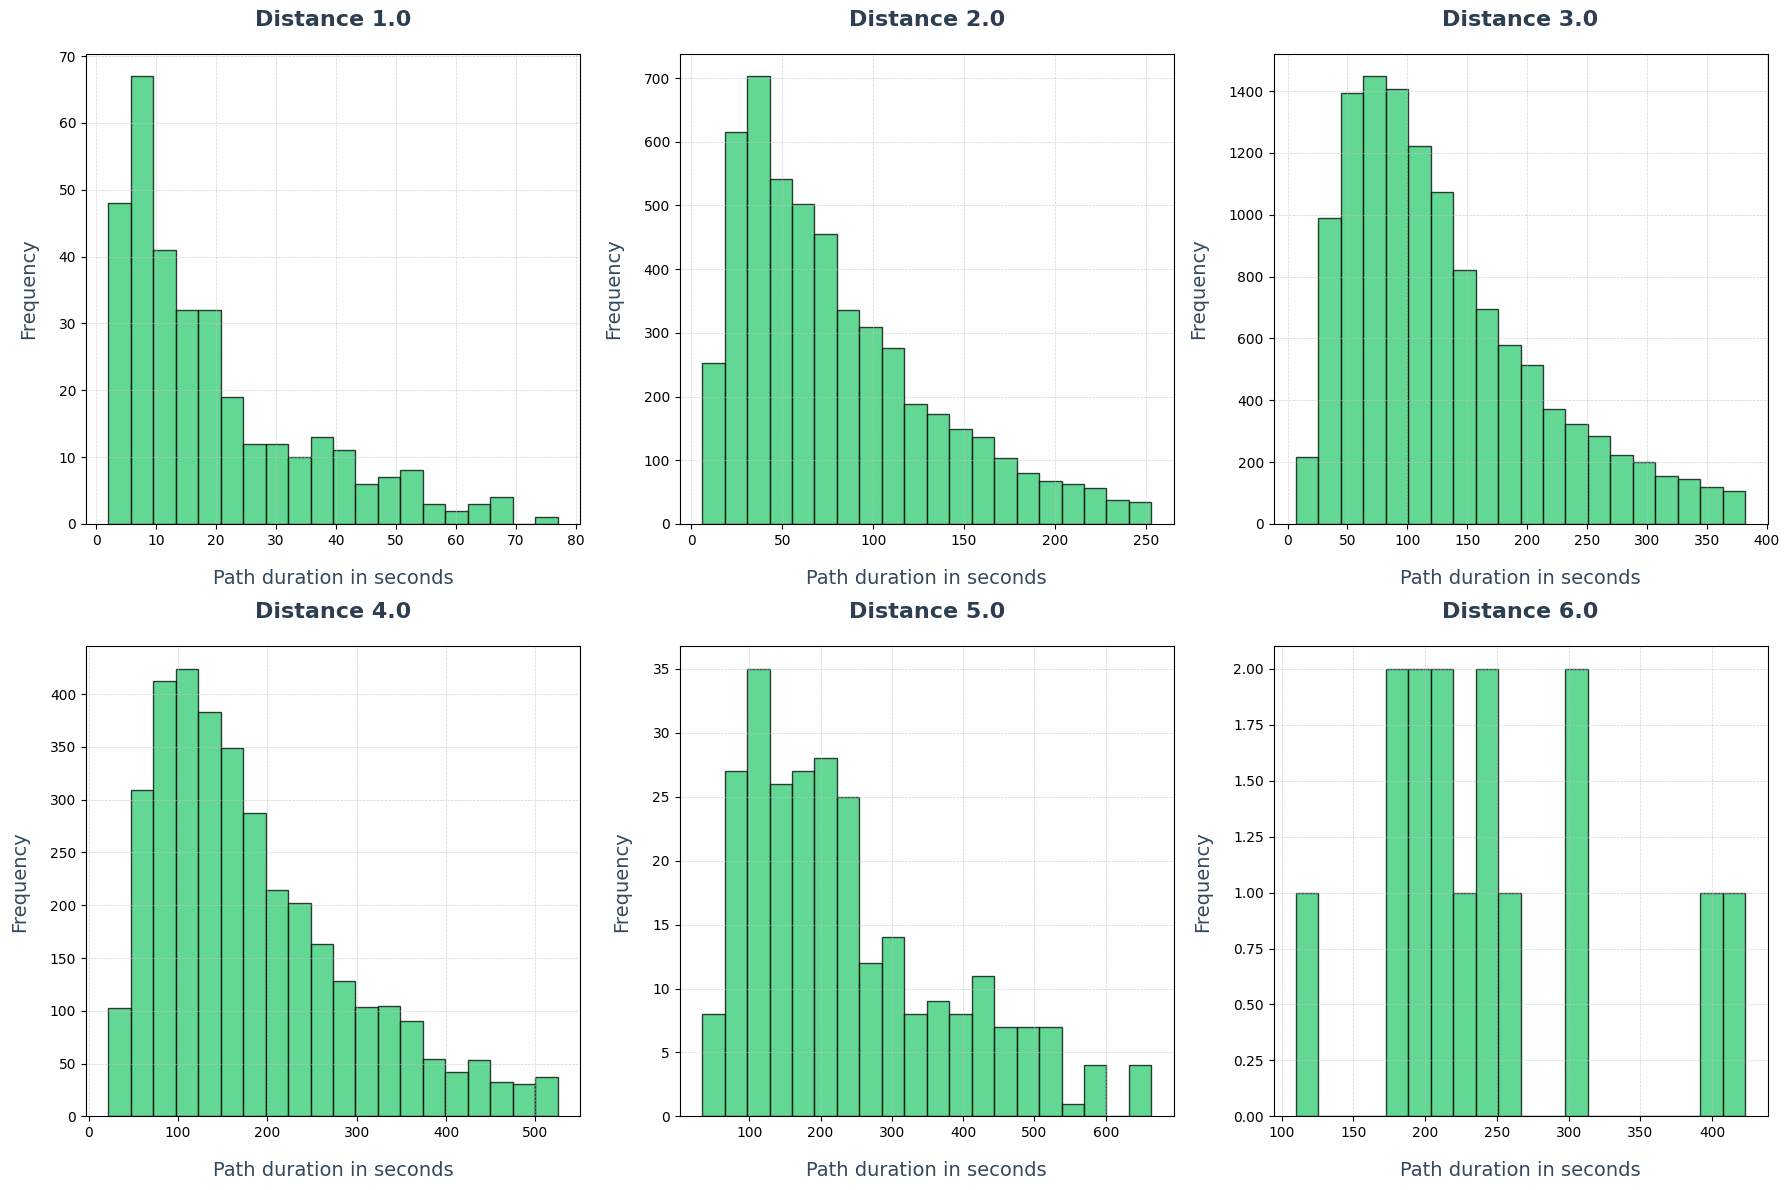

In [14]:
plot_by_distance(time_filt_finished_paths, 'durationInSec', x_label='Path duration in seconds', plot_type='hist', bins=20)

Now let's also have a look at the **unfinished paths**. We only consider the path length distribution, as in unfishished paths are not used for duration based article scoring.

Prior to filtering:


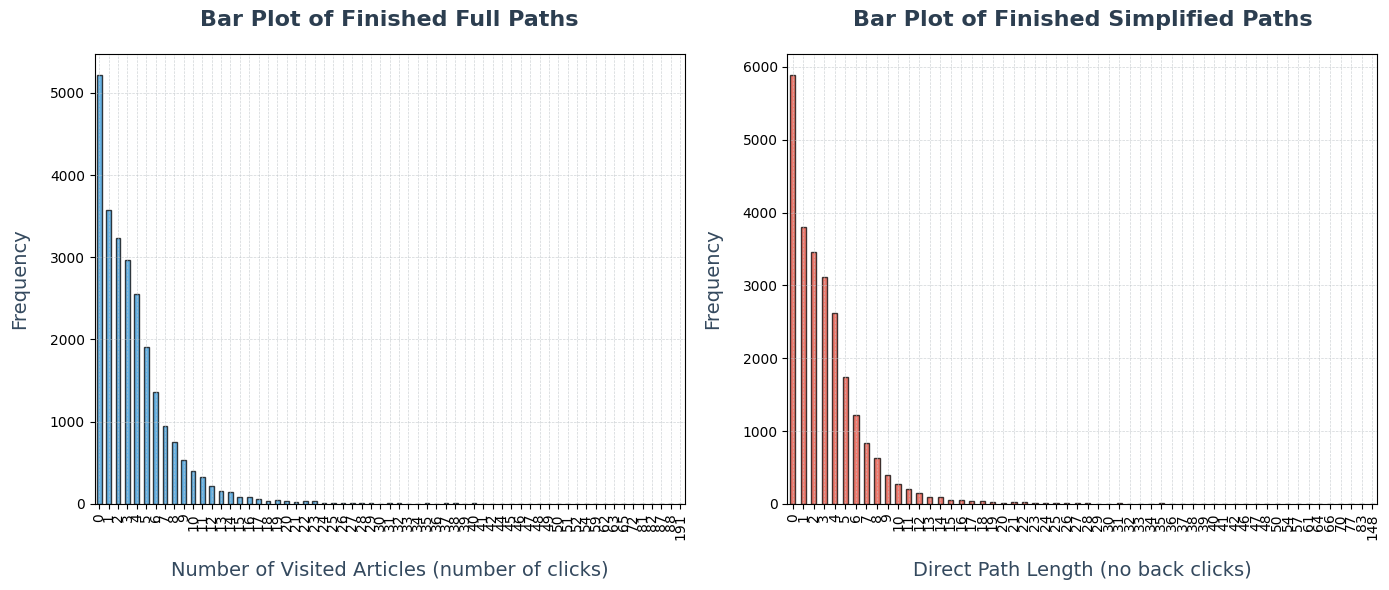

After filtering:


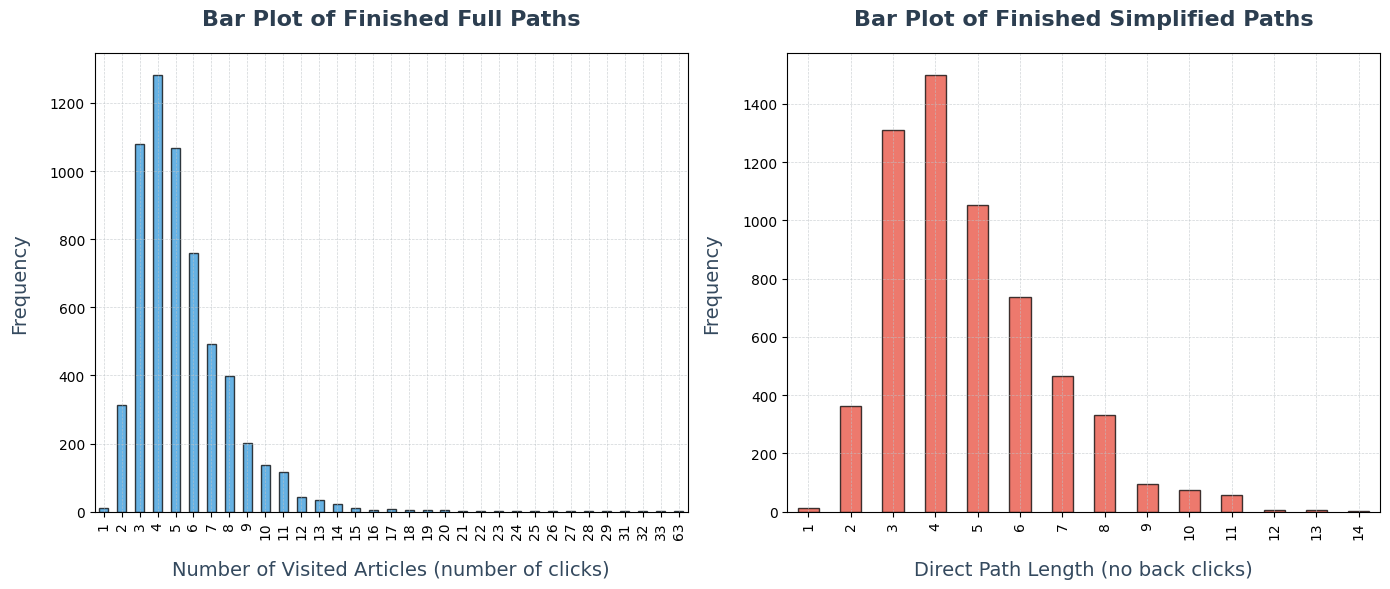

In [15]:
# Plot the histograms for full path and simpliefied path lengths prior to filtering
print("Prior to filtering:")
plot_path_length_distributions(unfinished_paths)

# And post filtering
print("After filtering:")
plot_path_length_distributions(filt_unfinished_paths)


# NEED TO CHANGE THE TITLE OF THE PLO!!!!!!!!!

 Again the histogram suggests that the filtering is reasonable.

For comparison let's also have a look at the distribution of the shortest possible distance distribution and its statistic. 

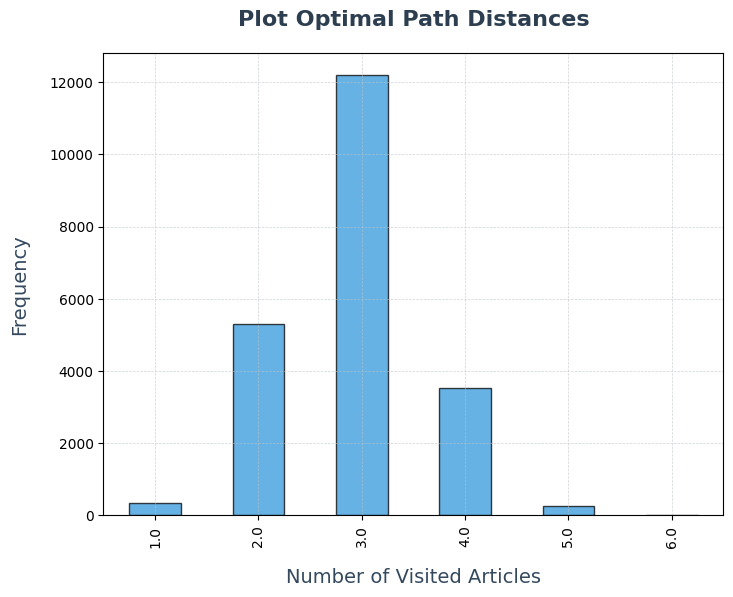

In [16]:
# plot the distribution of the shortest possible path lengths
distance_counts = length_filt_finished_paths['distance'].value_counts().sort_index()
plot_styled_bar_chart(distance_counts, title="Plot Optimal Path Distances", x_label="Number of Visited Articles", y_label="Frequency")

**Interesting observatin**

We just obversed that pretty much any article is reachable within at most 6 clicks (3 exeption with distance 7). This is interesting when we thik of the six degrees of separation idea...

## 1.3 OTHER STUFF TO ADD in this section:

- Also create a proof of concept smaller dataframe and as back up using the start-target pairs for which there are so many samples

- Make this comment that in the time filtering we found that players where racing each other achieving crazy fast times...

### Backup Dataframes for scoring

During the data filtering process, we noticed that while most start-target article pairs were played only a few times, there were some pairs that appeared more than 1000 times. To prevent these highly frequent pairs from disproportionately influencing article scores, we set a threshold (5) to downsample these pairs, in the filtering explained above.

However, we also want to use the data for the heavily repeated pairs to compute backup article scores. These scores won't reflect the global popularity or quality of an article, but rather its performance within a subset of the data. Specifically, the games where the pairings have been played very frequently. We expect these backup scores to be more robust for cases where the global scores might not perform well, serving as a proof of concept for when the global article scores fall short.

- `top_4_paths`: start-target pairs with more than 1000 samples.
- `top_10_paths`: start-target pairs with more than 100 samples.

In [17]:
top1_paths, top4_paths, top10_paths = backup_dataframes(paths_df)

# Filter with a very large threshold so no dowsampling is done

# filterering for backup top4 dataframe
print("Filtering for top 1 start-target pair:")
path_filt_top1, time_filt_top1, filt_unfinished_top1 = filter_paths(top1_paths, sampling_threshold=10000)
print("-"*50)

print("Filtering for top 4 start-target pairs:")
path_filt_top4, time_filt_top4, filt_unfinished_top4 = filter_paths(top4_paths, sampling_threshold=10000)
print("-"*50)

#print("Filtering for top 10 start-target pairs:")
#path_filt_top10, time_filt_top10, filt_unfinished_top10 = filter_paths(top10_paths, sampling_threshold=10000)
#print("-"*50)

Filtering for top 1 start-target pair:
--------------------------------------------------
In path length filtering a total of 73 paths were removed from the finished paths, which represents 7.019% of the original finished data.  854 paths remain.
--------------------------------------------------
In path length filtering a total of 636 paths were removed from the unfinished paths, which represents 63.347% of the original unfinished data.  287 paths remain.
--------------------------------------------------
In path time filtering a total of 63 paths were removed from the finished paths, which represents 6.058% of the original finished data.  864 paths remain.
--------------------------------------------------
--------------------------------------------------
Filtering for top 4 start-target pairs:
--------------------------------------------------
In path length filtering a total of 169 paths were removed from the finished paths, which represents 4.656% of the original finished data.  

In [18]:
# store the filtered dataframes as feather files

path_filt_top1.to_feather('Data/dataframes/path_filt_top1_paths.feather')
time_filt_top1.to_feather('Data/dataframes/time_filt_top1_paths.feather')
filt_unfinished_top1.to_feather('Data/dataframes/filt_unfinished_top1.feather')

path_filt_top4.to_feather('Data/dataframes/path_filt_top4_paths.feather')
time_filt_top4.to_feather('Data/dataframes/time_filt_top4_paths.feather')
filt_unfinished_top4.to_feather('Data/dataframes/filt_unfinished_top4.feather')

"""
path_filt_top10.to_feather('Data/dataframes/path_filtered_top10_paths.feather')
time_filt_top10.to_feather('Data/dataframes/time_filtered_top10_paths.feather')
filt_unfinished_top10.to_feather('Data/dataframes/unfinished_top10_paths.feather')
"""

"\npath_filt_top10.to_feather('Data/dataframes/path_filtered_top10_paths.feather')\ntime_filt_top10.to_feather('Data/dataframes/time_filtered_top10_paths.feather')\nfilt_unfinished_top10.to_feather('Data/dataframes/unfinished_top10_paths.feather')\n"

# Part 2: Article Scoring

Bellow we explain different scores that we cam up with to quantize artilce "goodness" in the game.

***Prioritizing Scores Based on Minimal Clicks*** 

### **Difference Between Played Path Length and Optimal Distance**  
- **Optimal Distance**: The shortest possible distance from the start to the target article.  
- **Played Path Length**: The actual number of clicks (or visited articles - 1). This is represented in the dataset as `simplified_path_length`.  
- Why use `simplified_path_length` instead of `full_path_length`?  
  Simplified paths eliminate detours, thus only the articles relevant in finishing the path are taken into account.

We define the **Path Score** for a completed path as:  
$$
\mathbf{Path\ Score} = \frac{\text{Optimal\ Distance}}{\text{Simplified\ Path\ Length}}
$$  

This score ranges from 0 to 1, where 1 indicates the closest adherence to the optimal path. We refer to this score as the **path weight**, representing the ratio of actual path length to optimal distance.

#### **Article Scoring Based on Path Weights**  
After computing path weights for all completed paths, we use them to derive article scores using two approaches:

1. **Weighted Average**  
   Compute the average path weight for each article across all paths it appears in:  
   $$
   \mathbf{Article\ Score} = \frac{\sum_{i=1}^n w_i}{n}
   $$  
   where  $w_1, w_2, \dots, w_n$ are the path weights, and  $n$ is the number of paths the article appears in.  
   - This score is about article quality over quantity.
   - Only articles with a minimum appearance threshold are included to ensure meaningful scores.  
   - **Function**: `calculate_avg_article_weights(df, count_cutoff=30, scaling=None)`  

2. **Sum of Centered Weights**  
   - **Centering**: First, compute the mean article weight across all paths:  
     $$
     \text{Mean\ Article\ Weight} = \frac{\sum_{i=1}^N (\text{path}_i\ \text{weight} \times \text{num\_artcicles\_in\_path}_i)}{\sum_{i=1}^N \text{num\_artcicles\_in\_path}_i}
     $$  
     where $N$ is the total number of paths (or a downsampled subset), and $\text{num\_artcicles\_in\_path}_i$ the number of articles in simplified path $i$ (without start and target article).

   - **Centered Weights**:  
     $$
     \mathbf{Centered\ Weight} = \mathbf{Path\ Score} - \text{Mean\ Article\ Weight}
     $$  
     Why center using article weight and not path weight? Because in the end, we are interested in computing article weights, and since paths don't have the same number of articles, the average path weight is not the same as the average article weight.

   - Compute the article score by summing all centered weights for the paths the article appears in:  
     $$
     \mathbf{Article\ Score} = \sum_{i=1}^n cw_i
     $$  
     where $cw_1, cw_2, \dots, cw_n$ are the centered weights.  
   - This score balances quality and usefulness within the game.  
   - Only articles with a minimum appearance threshold are included to ensure meaningful scores.  
   - **Function**: `calculate_sum_article_cweights(df, count_cutoff=30, scaling=None)`

---

## Scores Based on Article Appearance in Detours  

### **Detour Ratio**  
- Detours occur when articles are backtracked (i.e don't appear in simplified paths).  
- For each article  $i$, the **Detour Ratio** is:  
  $$
  \mathbf{DetourRatio_i} = \frac{\text{detour\_count}_i}{\text{total\_appearances}_i},
  $$  

  where the $\text{detour\_count}_i$ and $\text{total\_appearances}_i$ are the number of appearance in detours and total number of apperances for article $i$ respectively.  
  This score caputres information that the is not present in the weighted_abvg or sum scores, and is thus well suited to make a composite score.
- Only articles with a minimum total appearance threshold are considered.  
- **Function**: `calculate_detour_ratios(df, count_cutoff=30, scaling=None)`  

---

## Scores Based on Article Presence in Unfinished Paths  

### **Unfinished Ratio**  
- Measures how frequently an article appears in incomplete paths.  
- For each article $i$, the **Unfinished Ratio** is:  
  $$
  \mathbf{UnfinishedRatio_i} = \frac{\text{unfinished\_count}_i}{\text{total\_appearances}_i}
  $$  
- Again, articles must meet a minimum appearance threshold for meaningful scores.  
- **Function**: `calculate_unfinished_ratios(df, count_cutoff=30, scaling=None)`  

**========================================================================================================================================**

***Now Consider Scores That Reward Finishing the Game as Fast as Possible***

### **Weighted Average of Article Speed**  
We first compute **path speed**, defined as the time taken to complete the path (from `durationInSec`) divided by `full_path_length`. Similar to the weighted average of path weights, we can compute the average speed for each article. This involves extracting all $n$ paths an article appears in and calculating the average of the associated path speeds $s_1, s_2, \dots, s_n$:  
$$
\mathbf{Article\ Speed} = \frac{\sum_{i=1}^n s_i}{n}
$$  

Where $s_1, s_2, \dots, s_n$ are the path speeds, and $n$ is the number of paths containing the article.  

- Only articles with a minimum total appearance threshold are included for meaningful scores.  
- **Function**: `calc_avg_article_speed(df, count_cutoff=30, scaling=None)`  

---

### **Sum of Centered Article Speed**  
This approach mirrors the **sum of centered weights** but uses **path speed** instead of path weight.  

1. **Centering**: Compute the mean path speed across all paths:  
   $$
   \text{Mean\ Path\ Speed} = \frac{\sum_{i=1}^N (\text{path}_i\ \text{speed} \times \text{full\_path\_length}_i)}{\sum_{i=1}^N \text{full\_path\_length}_i}
   $$  
   where $N$ is the total number of paths (or a downsampled subset).  

2. **Centered Speeds**:  
   $$
   \mathbf{Centered\ Speed} = \mathbf{Path\ Speed} - \text{Mean\ Path\ Speed}
   $$  

3. Compute the article score by summing all centered speeds for the paths the article appears in:  
   $$
   \mathbf{Article\ Score} = \sum_{i=1}^n cs_i
   $$  
   where $cs_1, cs_2, \dots, cs_n$ are the centered speeds, and $n$ is the number of paths the article appears in.  

- This score provides a balance between high speed and frequency of appearances. 
- **Function**: `calc_sum_article_cspeed(df, count_cutoff=30, scaling=None)`  

---  
***Imporant note about the scaling***  
The functions are all coded in a way that when scaling is applied to the scores, large values always are better. So for example, even if the ratio of unfinished paths should be as small as possible, the sacled score column, is flipped, so that larger means better. This way when different scores are combined in a composite score, bigger is also always better.

---  

In [19]:
# temp cell so i don't have to rerun everything
from src.utils.score_utils import *
from src.scripts.scores import compute_scores_df, calculate_composite_scores

import pandas as pd
import numpy as np
from pyarrow.feather import read_feather
import seaborn as sns
from src.utils.helpers import plot_scaled_score_correlations, perform_pca_and_plot

In [20]:
# temp cell so i don't need to run everything all the time
length_filt_finished_paths = read_feather('Data/dataframes/length_filt_finished_paths.feather')
time_filt_finished_paths = read_feather('Data/dataframes/time_filt_finished_paths.feather')
filt_unfinished_paths = read_feather('Data/dataframes/filt_unfinished_paths.feather')

# also the backup dataframes
path_filt_top1 = read_feather('Data/dataframes/path_filt_top1_paths.feather')
time_filt_top1 = read_feather('Data/dataframes/time_filt_top1_paths.feather')
filt_unfinished_top1 = read_feather('Data/dataframes/filt_unfinished_top1.feather')

path_filt_top4 = read_feather('Data/dataframes/path_filt_top4_paths.feather')
time_filt_top4 = read_feather('Data/dataframes/time_filt_top4_paths.feather')
filt_unfinished_top4 = read_feather('Data/dataframes/filt_unfinished_top4.feather')

"""
path_filtered_top10 = read_feather('Data/dataframes/path_filtered_top10_paths.feather')
time_filtered_top10_paths = read_feather('Data/dataframes/time_filtered_top10_paths.feather')
filt_unfinished_top10 = read_feather('Data/dataframes/unfinished_top10_paths.feather')
"""

"\npath_filtered_top10 = read_feather('Data/dataframes/path_filtered_top10_paths.feather')\ntime_filtered_top10_paths = read_feather('Data/dataframes/time_filtered_top10_paths.feather')\nfilt_unfinished_top10 = read_feather('Data/dataframes/unfinished_top10_paths.feather')\n"

Compute the scores for the filtered data sets

In [21]:
# This can take over a minute to run
click_scores_df, speed_scores_df = compute_scores_df(length_filt_finished_paths, 
                              pd.concat([length_filt_finished_paths, filt_unfinished_paths]),
                              time_filt_finished_paths, 
                              count_cutoff=30,
                              scaling='standard')

Calculating click related scores...
Ratio of unfinished over finished paths: 0.21736929640610314
Calculating speed related scores...
Number of unique articles in click score df: 627
Number of unique articles in speed score df: 664


## 2.1 Score anaylsis

### Check how the scores are correlated
If we want to define reasonable composite scores we should do some anaylsis on the relation between the scores.

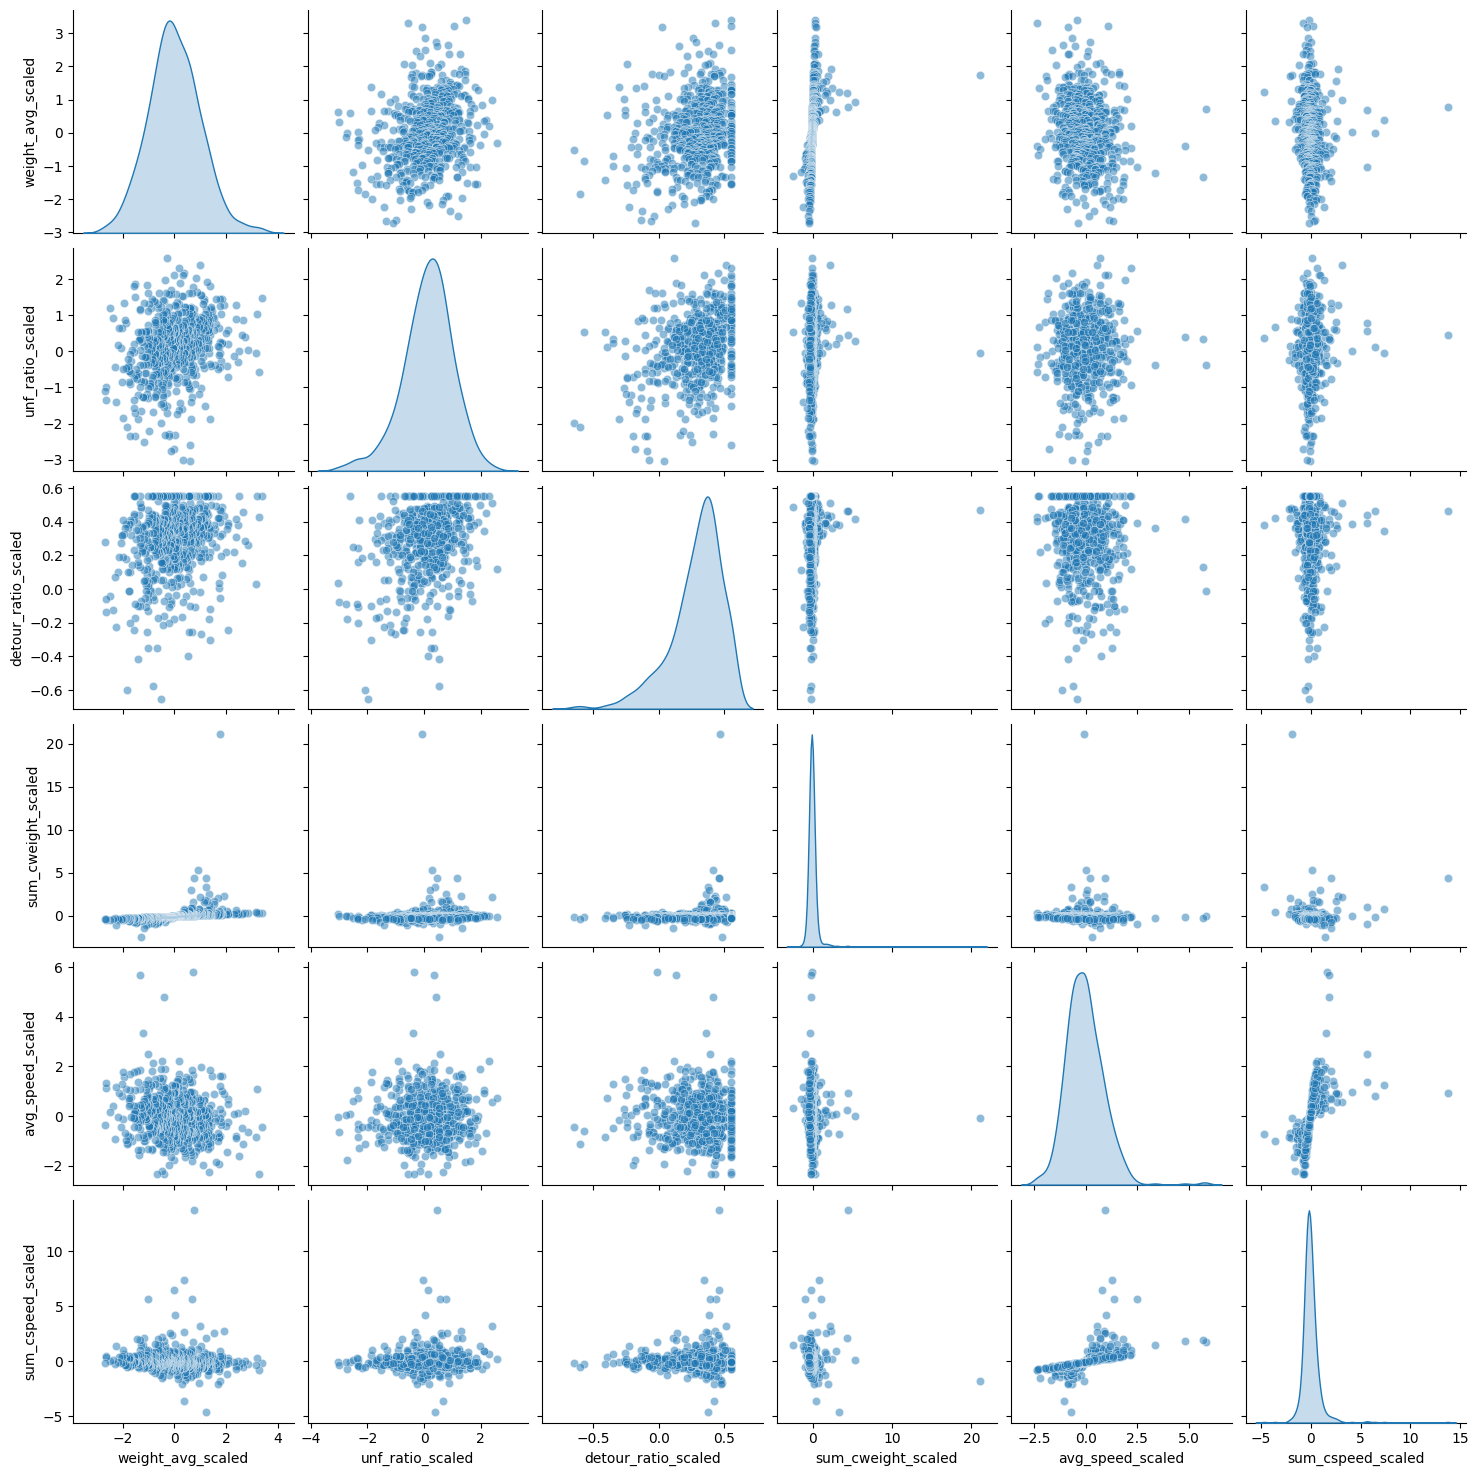

In [ ]:
plot_scaled_score_correlations(scores_df = pd.merge(click_scores_df, speed_scores_df, on='article'))

**Comment (to redo later)**

In the sum of centered weight and speed scores, there are clear outliers, this is not really a surprise as article that appear a lot more often, can have very large/small values in these scores. Maybe these extreme values should be removed for ML tasks.

There does not appear to be any clear correlation, which is a bit surprising, but also indicates that the different scores are not redundant

In [47]:
# since the scores that are summed have very clear outliers rank and then minmax sclae 

scores_df = pd.merge(click_scores_df, speed_scores_df, on='article')

temp = scores_df.drop('United_States')
# drop the row wiht index 'United_States' since it is an outlier


scores_df['sum_cspeed_scaled'] = scores_df['sum_cspeed_scaled'].rank(method='min', ascending=True)

scores_df['sum_cweight_scaled'] = scores_df['sum_cweight_scaled'].rank(method='max', ascending=True)
scores_df.sort_values(by='sum_cweight_scaled', ascending=False)

,n_appearances_x,avg_weight,weight_avg_scaled,detour_ratio,detour_ratio_scaled,unf_ratio,unf_ratio_scaled,sum_cweight,sum_cweight_scaled,n_appearances_y,avg_speed,avg_speed_scaled,sum_cspeed,sum_cspeed_scaled
article,,,,,,,,,,,,,,
United_States,3649.0,0.691392,1.744903,0.017876,0.472840,0.237249,-0.056667,270.962791,620.0,3678.0,0.052265,-0.072870,-1.556989,6.0
United_Kingdom,1765.0,0.656429,0.925092,0.029973,0.418165,0.210644,0.276149,69.352318,619.0,1744.0,0.052787,-0.001135,0.172166,428.0
Europe,1761.0,0.649901,0.772029,0.020476,0.461090,0.195890,0.460708,57.699556,618.0,1801.0,0.059491,0.919938,12.249964,620.0
Africa,1109.0,0.668338,1.204332,0.020372,0.461559,0.138306,1.181056,56.783275,617.0,1111.0,0.054422,0.223500,1.925901,607.0
World_War_II,817.0,0.669650,1.235093,0.038824,0.378160,0.202927,0.372687,42.904066,616.0,785.0,0.047504,-0.727129,-4.069943,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Christianity,346.0,0.584535,-0.760625,0.039216,0.376388,0.236203,-0.043582,-11.279618,5.0,354.0,0.051639,-0.158984,-0.371704,111.0
Great_Britain,275.0,0.570601,-1.087361,0.146032,-0.106410,0.280105,-0.592767,-12.797073,4.0,283.0,0.056206,0.468607,0.995376,586.0
Country,140.0,0.521029,-2.249696,0.172619,-0.226582,0.345794,-1.414509,-13.454913,3.0,143.0,0.061380,1.179615,1.242890,592.0


In [25]:
click_scores_df.head(1)

,n_appearances,avg_weight,weight_avg_scaled,detour_ratio,detour_ratio_scaled,unf_ratio,unf_ratio_scaled,sum_cweight,sum_cweight_scaled
article,,,,,,,,,
Mercury_(element),31.0,0.761674,3.392847,0.0,0.553639,0.114286,1.481539,4.480706,0.258261


## Determining a meaningfull composite score

We would now like to combine some of the scores as they capture different aspects of the data. 
the scores that make sense to combine (after scaling) are:
- `weighted_avg`, `detour_ratio`, and `unfinished_ratio`
- `weighted_avg` and `detour_ratio`
- `sum_cweights`, `detour_ratio`, and `unfinished_ratio`
- `sum_cweights` and `detour_ratio`

Ideally, we would do so using a data driven approach. (**refine text**)

- First evaluate if PCA can be used to combine the scores
    by only considering the first principle component (PC1), we can potentially, combine mulitple scores. However, this only makes sense if the PC1 captures a large portion of the variance.
- Weighted Sum: combine the scores giving the a weight.


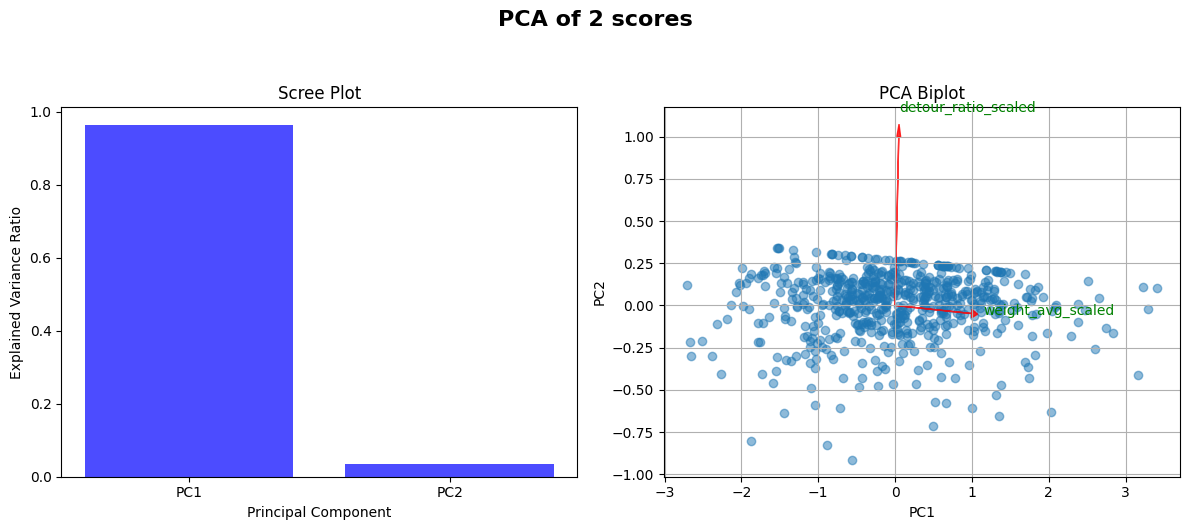

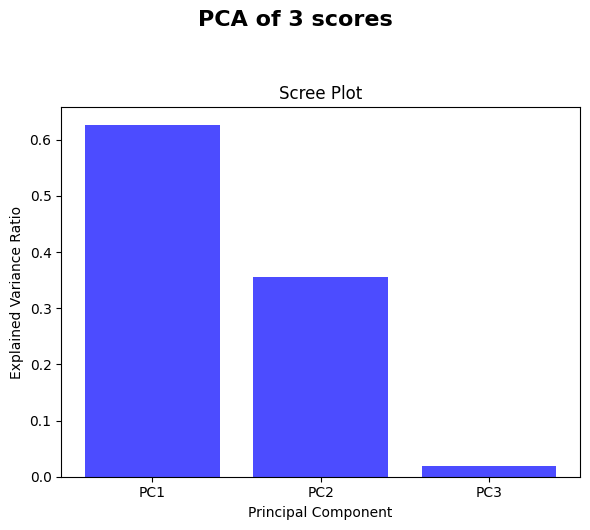

In [26]:
pca2, pca_components2 = perform_pca_and_plot(scores_df, components = ['weight_avg_scaled', 'detour_ratio_scaled'], biplot=True, title='PCA of 2 scores')
pca3, pca_components3 = perform_pca_and_plot(scores_df, components = ['weight_avg_scaled', 'detour_ratio_scaled', 'unf_ratio_scaled'], title='PCA of 3 scores', biplot=False)

**Comment**

A rule of thumb is that the first principle component should capture at least 70% of the variance, if we want to use it for our composite scores. In both cases, it is below that, so it is probably not ideal as to much information would be lost in such a dimensionality reduction. but the combined score of only 2 metrics is close so we also consider it...

## Alternative: weighted sum of the scores.

The **weighted sum score** is calculated by combining individual scores, each multiplied by their respective weight. The formula is as follows:


$$
\text{Composite Score} = (w_1 \cdot score_1) + (w_2 \cdot score_2) + (w_3 \cdot score_3)
$$


We first tried an other more data-driven approach, where the idea was that weights are assigned accroding to the the amount of variance of the score. So, the larger the variance the larger the score's weight i.e contribution to the composite score. However, we did not decide to use this method as in our opinion it results in an unreasonably large contribuion of the unfinished ratio score. This is because overall, after filtering, the unfinished paths data represents a small fraction of the total filtered data, and there is still no guarante that the player really 'tried' in those attempts.


### Define Custom Weight for Composite Scores

This might at first appear quite arbitrary. But the data driven approaches don't appear to make the most sense, and since these scores are defined by us in the first place, it is not so far fetched that we also define how to weight them to get a composite score.
We thus defines set:

- $w_1 = 0.55$ (Weight for average scaled value)
- $w_2 = 0.25$ (Weight for detour ratio scaled)
- $w_3 = 0.2$ (Weight for unfinished ratio scaled)

$$
quality_3 = w_1 \cdot \text{avg\_weight\_scaled} + w_2 \cdot \text{detour\_ratio\_scaled} +  w_3 \cdot \text{unf\_ratio\_scaled}
$$

$$
utility_3 = w_1 \cdot \text{sum\_cweight\_scaled} + w_2 \cdot \text{detour\_ratio\_scaled} + w_3 \cdot \text{unf\_ratio\_scaled}
$$

and

- $w_1 = 0.65$ (Weight for average scaled value)
- $w_2 = 0.35$ (Weight for detour ratio scaled)


$$
quality_2 = w_1 \cdot \text{avg\_weight\_scaled} + w_2 \cdot \text{detour\_ratio\_scaled}
$$

$$
utility_2 = w_1 \cdot \text{sum\_cweight\_scaled} + w_2 \cdot \text{detour\_ratio\_scaled}
$$

Note that the difference between **quality** and **utility** compoiste scores is that in one we consider the weighted average and in the other the sum of centered average weights.


In [27]:
quality_scores_clicks, utility_scores_clicks = calculate_composite_scores(click_scores_df)

# for the speed related score we don't compute composite scores
speed_scores = speed_scores_df[['avg_speed_scaled', 'sum_cspeed_scaled']].sort_values(by='avg_speed_scaled', ascending=False)

# store the scores dataframes as feather files
quality_scores_clicks.to_feather('Data/dataframes/quality_scores_clicks.feather')
utility_scores_clicks.to_feather('Data/dataframes/utility_scores_clicks.feather')
speed_scores.to_feather('Data/dataframes/speed_scores.feather')

### Exact same for backup datasets

maybe make a script for this and don't show the plots so everything is more consise.
If not need to add some comments here as well.

In [28]:
top_1_click_scores_df, top_1_speed_scores_df = compute_scores_df(path_filt_top1,
                                    pd.concat([path_filt_top1, filt_unfinished_top1]),
                                    time_filt_top1,
                                    count_cutoff=50,
                                    scaling='standard')

top_10_scores_df = pd.merge(top_1_click_scores_df, top_1_speed_scores_df, on='article')

Calculating click related scores...


KeyboardInterrupt: 

In [ ]:
top_4_click_scores_df, top_4_speed_scores_df = compute_scores_df(path_filt_top4,
                                    pd.concat([path_filt_top4, filt_unfinished_top4]),
                                    time_filt_top4,
                                    count_cutoff=30,
                                    scaling='standard')

top_4_scores_df = pd.merge(top_4_click_scores_df, top_4_speed_scores_df, on='article')

Calculating click related scores...


/Users/finnweikert/Desktop/Ada/ada-2024-project-adaholiks/src/utils/score_utils.py:188: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  }).fillna(0)


Ratio of unfinished over finished paths: 0.0
Calculating speed related scores...
Number of unique articles in click score df: 91
Number of unique articles in speed score df: 34


In [28]:


# Remember that I used more severe filtering here

Calculating click related scores...
Ratio of unfinished over finished paths: 0.22819516407599305
Calculating speed related scores...
Number of unique articles in click score df: 75
Number of unique articles in speed score df: 78


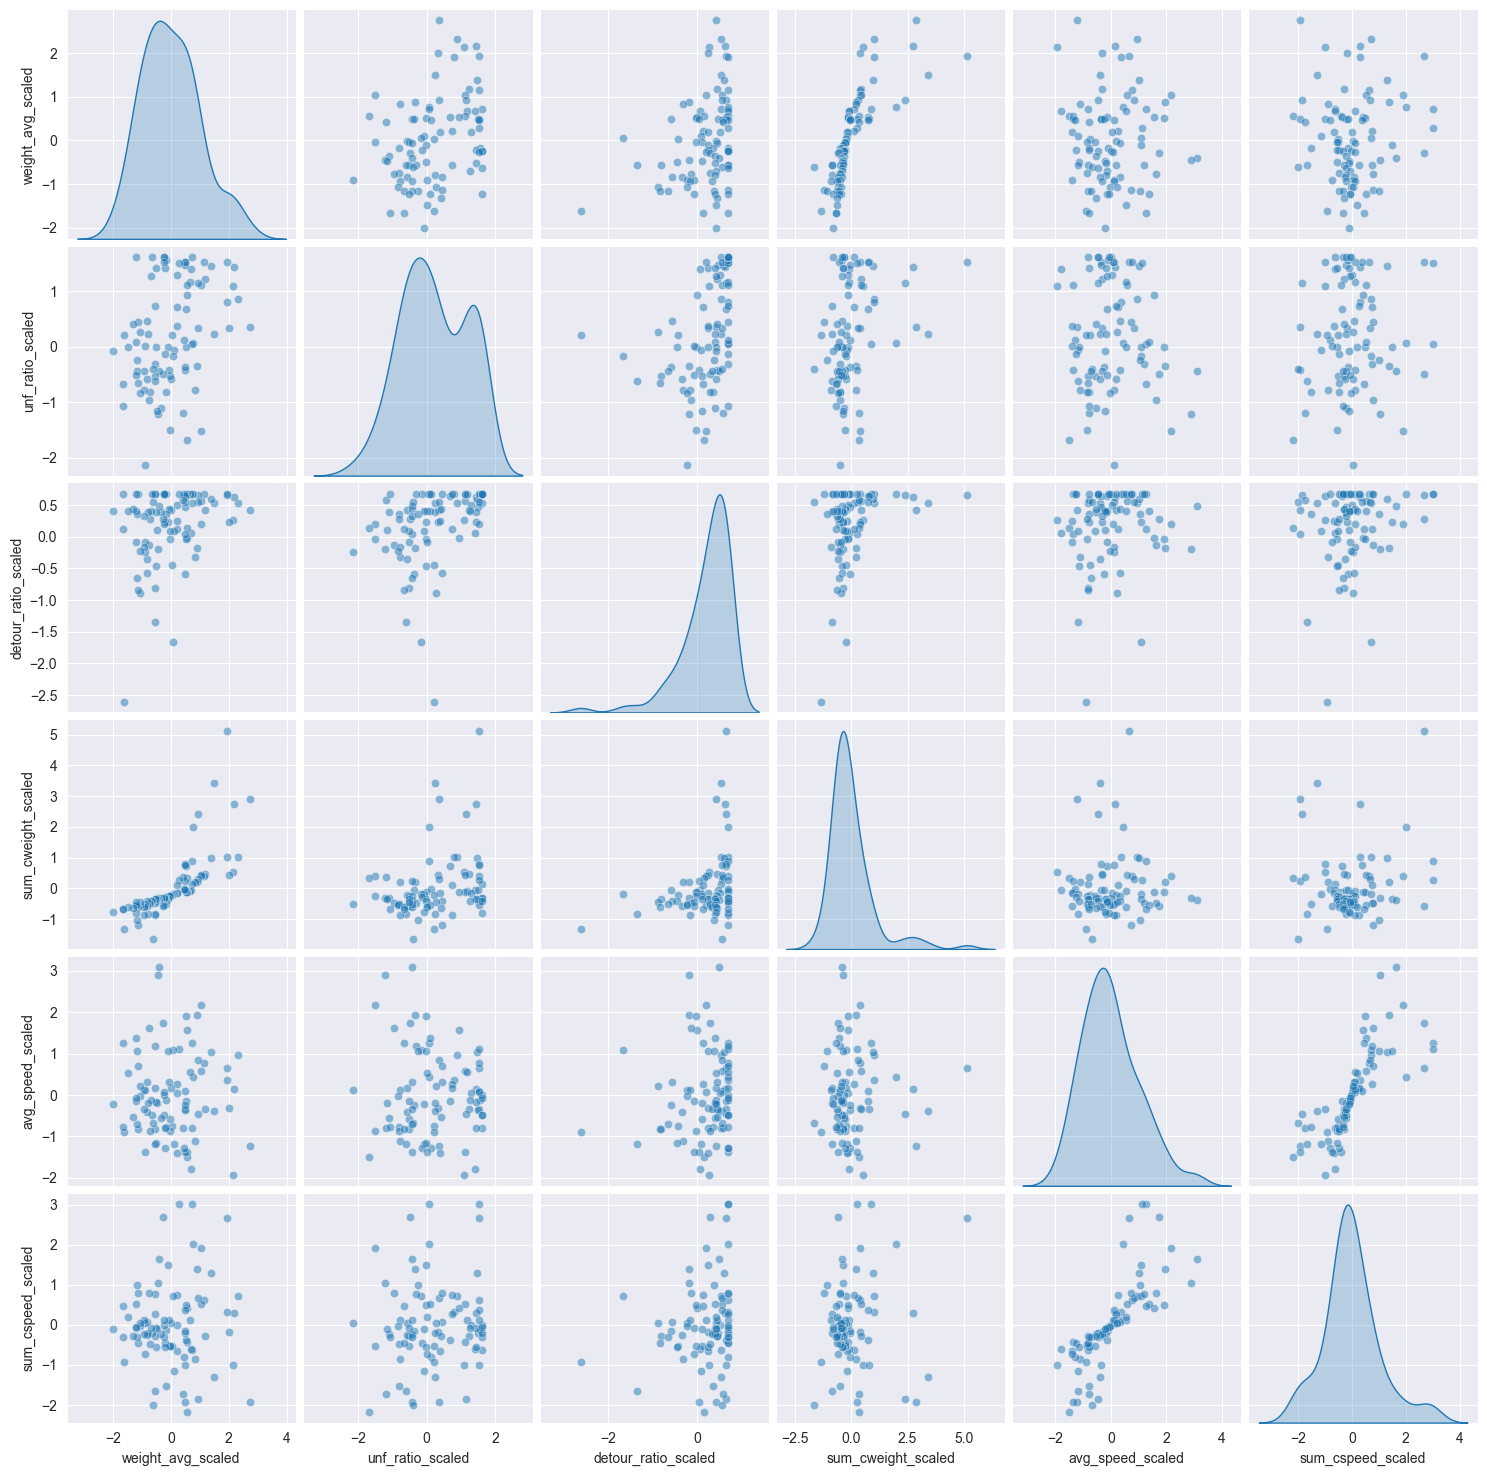

In [29]:
plot_scaled_score_correlations(top_4_scores_df)

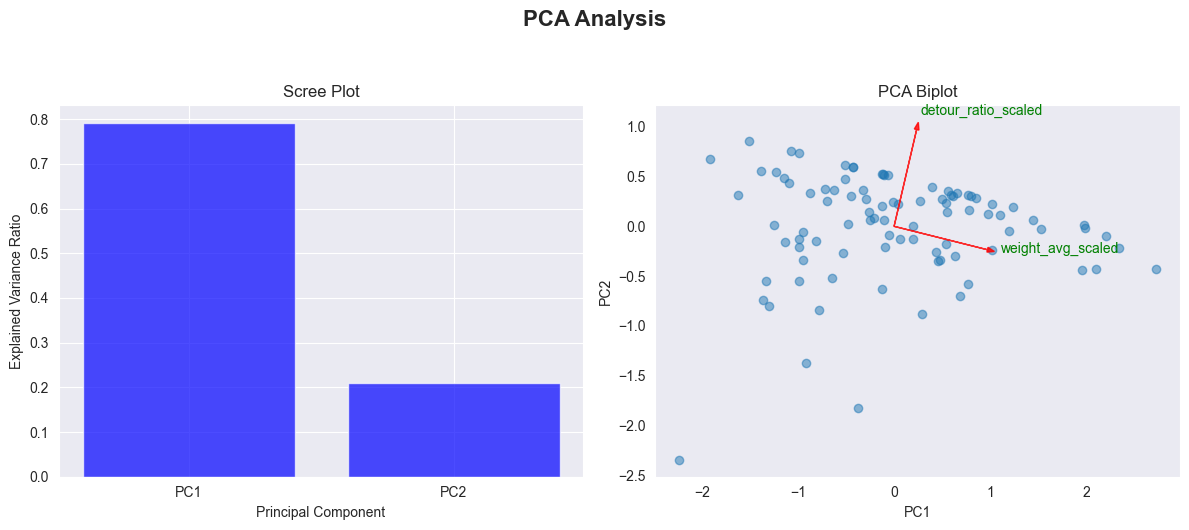

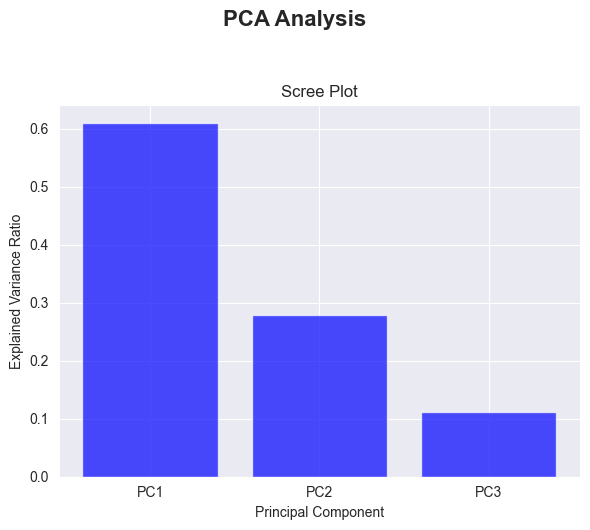

In [30]:
_, _ = perform_pca_and_plot(top_4_scores_df, components = ['weight_avg_scaled', 'detour_ratio_scaled'], biplot=True)
_, _ = perform_pca_and_plot(top_4_scores_df, components = ['weight_avg_scaled', 'detour_ratio_scaled', 'unf_ratio_scaled', ], biplot=False)

In [31]:
top4_quality_scores_clicks, top4_utility_scores_clicks = calculate_composite_scores(top_4_click_scores_df)
top4_scores_speed = top_4_speed_scores_df[['avg_speed_scaled', 'sum_cspeed_scaled']]#.sort_values(by='avg_speed_scaled', ascending=False)


top10_quality_scores_clicks, top10_utility_scores_clicks = calculate_composite_scores(top_10_click_scores_df)
top10_scores_speed = top_10_speed_scores_df[['avg_speed_scaled', 'sum_cspeed_scaled']]#.sort_values(by='avg_speed_scaled', ascending=False)

# store the scores dataframes as feather files
top_4_scores_df.to_feather('Data/dataframes/top_4_scores_df.feather')
top_4_click_scores_df.to_feather('Data/dataframes/top_4_click_scores_df.feather')
top_4_speed_scores_df.to_feather('Data/dataframes/top_4_speed_scores_df.feather')

top_10_scores_df.to_feather('Data/dataframes/top_10_scores_df.feather')
top_10_click_scores_df.to_feather('Data/dataframes/top_10_click_scores_df.feather')
top_10_speed_scores_df.to_feather('Data/dataframes/top_10_speed_scores_df.feather')

In [32]:
top_4_click_scores_df

,n_appearances,avg_weight,weight_avg_scaled,detour_ratio,detour_ratio_scaled,unf_ratio,unf_ratio_scaled,sum_cweight,sum_cweight_scaled
article,,,,,,,,,
India,184.0,0.729348,2.752912,0.021053,0.421739,0.159817,0.352008,36.199062,2.890137
Carl_Friedrich_Gauss,86.0,0.698810,2.331389,0.011364,0.539825,0.094737,0.868708,14.292782,1.009212
Information,224.0,0.686751,2.164949,0.004425,0.624392,0.021834,1.447512,34.526630,2.746538
World_Wide_Web,57.0,0.685652,2.149773,0.033333,0.272068,0.065574,1.100245,8.723123,0.530988
Psychology,52.0,0.675298,2.006858,0.036364,0.235136,0.161290,0.340313,7.419528,0.419058
...,...,...,...,...,...,...,...,...,...
Greek_mythology,43.0,0.422453,-1.483112,0.021739,0.413373,0.203704,0.003577,-4.736942,-0.624725
Herbivore,106.0,0.412157,-1.625225,0.269737,-2.609112,0.178295,0.205310,-12.768488,-1.314332
Actor,42.0,0.409751,-1.658440,0.045455,0.124340,0.288136,-0.666761,-5.160280,-0.661074


In [33]:
top4_quality_scores_clicks

,n_appearances,composite_3,composite_2,PCA_composite_2
article,,,,
India,184.0,1.689938,1.937002,2.728806
Information,224.0,1.636322,1.625754,2.204898
Carl_Friedrich_Gauss,86.0,1.590962,1.704342,2.346816
Communication,453.0,1.535292,1.487345,1.990106
World_Wide_Web,57.0,1.470441,1.492576,2.107385
...,...,...,...,...
Giraffe,55.0,-0.972830,-1.042751,-1.361677
Food,49.0,-0.991813,-0.680581,-0.994225
Actor,42.0,-1.014409,-1.034467,-1.628972


In [34]:
def filter_dataframe_by_name_exclude_ends(df, article):
    return df[df['simplified_path'].apply(
        lambda paths: any(name in paths[1:-1] for name in article)
    )]

filter_dataframe_by_name_exclude_ends(path_filt_top4, ['Herbivore']).sort_values(by='full_path_length', ascending=True)

,hashedIpAddress,timestamp,durationInSec,path,rating,finished,failure_reason,start_article,target_article,identifier,full_path,simplified_path,distance,full_path_length,simplified_path_length
298,276f5f9603acc0b9,1358532087,97,Theatre;India;Africa;Herbivore;Lion;Zebra,2.0,True,None,Theatre,Zebra,38072,"[Theatre, India, Africa, Herbivore, Lion, Zebra]","[Theatre, India, Africa, Herbivore, Lion, Zebra]",3.0,5,5
1734,7b47e1415b3aeddb,1359930162,266,Theatre;India;Africa;Herbivore;Lion;Zebra,2.0,True,None,Theatre,Zebra,38072,"[Theatre, India, Africa, Herbivore, Lion, Zebra]","[Theatre, India, Africa, Herbivore, Lion, Zebra]",3.0,5,5
2013,689c76c60c9ed780,1384305906,97,Theatre;India;Africa;Herbivore;Lion;Zebra,NaN,True,None,Theatre,Zebra,38072,"[Theatre, India, Africa, Herbivore, Lion, Zebra]","[Theatre, India, Africa, Herbivore, Lion, Zebra]",3.0,5,5
1197,475a3c7205039736,1360855761,164,Theatre;Paris;Africa;Herbivore;Lion;Zebra,NaN,True,None,Theatre,Zebra,38072,"[Theatre, Paris, Africa, Herbivore, Lion, Zebra]","[Theatre, Paris, Africa, Herbivore, Lion, Zebra]",3.0,5,5
2081,05df94a25c85351a,1367433922,137,Theatre;India;Africa;Herbivore;Lion;Zebra,2.0,True,None,Theatre,Zebra,38072,"[Theatre, India, Africa, Herbivore, Lion, Zebra]","[Theatre, India, Africa, Herbivore, Lion, Zebra]",3.0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,1c666832384d994e,1354812209,154,Theatre;India;Europe;Earth;Plate_tectonics;Afr...,5.0,True,None,Theatre,Zebra,38072,"[Theatre, India, Europe, Earth, Plate_tectonic...","[Theatre, India, Europe, Earth, Plate_tectonic...",3.0,11,11
2348,63c4f41031aef65b,1302397949,250,Theatre;Drama;Film;Animation;Motion_(physics);...,5.0,True,None,Theatre,Zebra,38072,"[Theatre, Drama, Film, Animation, Motion_(phys...","[Theatre, Drama, Film, Animation, The_Lion_Kin...",3.0,11,9
2090,6abc57453cae0316,1367909205,541,Theatre;Drama;Television;Film;Photography;Fran...,5.0,True,None,Theatre,Zebra,38072,"[Theatre, Drama, Television, Film, Photography...","[Theatre, Drama, Television, Film, Photography...",3.0,11,11
622,6e2c0fe2782306ab,1345830928,254,Theatre;Opera;Napoleon_I_of_France;Egypt;North...,NaN,True,None,Theatre,Zebra,38072,"[Theatre, Opera, Napoleon_I_of_France, Egypt, ...","[Theatre, Opera, Napoleon_I_of_France, Egypt, ...",3.0,11,11


In [35]:
top_4_speed_scores_df

,n_appearances,avg_speed,avg_speed_scaled,sum_cspeed,sum_cspeed_scaled
article,,,,,
Photosynthesis,61.0,0.072236,3.087566,1.458788,1.638122
Life,42.0,0.070804,2.900439,0.944237,1.045475
Ancient_Egypt,100.0,0.065278,2.178725,1.695615,1.910894
Cereal,82.0,0.063488,1.944933,1.243625,1.390303
Emotion,32.0,0.063124,1.897442,0.473681,0.503501
...,...,...,...,...,...
South_Africa,58.0,0.037954,-1.390071,-0.601332,-0.734674
Middle_Ages,52.0,0.037918,-1.394811,-0.541013,-0.665199
Mexico,165.0,0.037063,-1.506418,-1.857667,-2.181689


In [36]:
top4_scores_speed

,avg_speed_scaled,sum_cspeed_scaled
article,,
Photosynthesis,3.087566,1.638122
Life,2.900439,1.045475
Ancient_Egypt,2.178725,1.910894
Cereal,1.944933,1.390303
Emotion,1.897442,0.503501
...,...,...
South_Africa,-1.390071,-0.734674
Middle_Ages,-1.394811,-0.665199
Mexico,-1.506418,-2.181689


In [37]:
def filter_dataframe_by_name_exclude_ends(df, article):
    return df[df['simplified_path'].apply(
        lambda paths: any(name in paths[1:-1] for name in article)
    )]

filter_dataframe_by_name_exclude_ends(time_filt_top4, ['Photosynthesis']).sort_values(by='durationInSec', ascending=True)


,hashedIpAddress,timestamp,durationInSec,path,rating,finished,failure_reason,start_article,target_article,identifier,full_path,simplified_path,distance,full_path_length,simplified_path_length
145,68da6f9976c687ca,1346693080,20,Pyramid;Sun;Photosynthesis;Plant;Seed;Bean,NaN,True,None,Pyramid,Bean,31392,"[Pyramid, Sun, Photosynthesis, Plant, Seed, Bean]","[Pyramid, Sun, Photosynthesis, Plant, Seed, Bean]",3.0,5,5
2968,780d039b11e7d9e9,1383310940,29,Pyramid;Earth;Photosynthesis;Plant;Seed;Bean,NaN,True,None,Pyramid,Bean,31392,"[Pyramid, Earth, Photosynthesis, Plant, Seed, ...","[Pyramid, Earth, Photosynthesis, Plant, Seed, ...",3.0,5,5
2286,0e8c413746acb96a,1302986770,32,Pyramid;Earth;Photosynthesis;Plant;Seed;Bean,NaN,True,None,Pyramid,Bean,31392,"[Pyramid, Earth, Photosynthesis, Plant, Seed, ...","[Pyramid, Earth, Photosynthesis, Plant, Seed, ...",3.0,5,5
833,3390e84d41c645a3,1301384933,33,Pyramid;Sun;Photosynthesis;Plant;Flower;Seed;Bean,3.0,True,None,Pyramid,Bean,31392,"[Pyramid, Sun, Photosynthesis, Plant, Flower, ...","[Pyramid, Sun, Photosynthesis, Plant, Flower, ...",3.0,6,6
2202,0cfd65633a49cbb4,1309556394,35,Pyramid;Earth;Sun;Sunlight;Photosynthesis;Plan...,NaN,True,None,Pyramid,Bean,31392,"[Pyramid, Earth, Sun, Sunlight, Photosynthesis...","[Pyramid, Earth, Sun, Sunlight, Photosynthesis...",3.0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,28a5e827325f25fc,1336157541,322,Pyramid;Earth;Photosynthesis;Plant;Soybean;Cal...,NaN,True,None,Pyramid,Bean,31392,"[Pyramid, Earth, Photosynthesis, Plant, Soybea...","[Pyramid, Earth, Photosynthesis, Plant, Soybea...",3.0,11,10
3018,4d4b3e8b7b19bb3d,1346771180,326,Pyramid;Sun;Photosynthesis;Plant;Soybean;Palm_...,NaN,True,None,Pyramid,Bean,31392,"[Pyramid, Sun, Photosynthesis, Plant, Soybean,...","[Pyramid, Sun, Photosynthesis, Plant, Herbivor...",3.0,10,7
363,1afd1270383bc1fc,1388215715,328,Pyramid;Sun;Photosynthesis;Plant;Soybean;Peanu...,4.0,True,None,Pyramid,Bean,31392,"[Pyramid, Sun, Photosynthesis, Plant, Soybean,...","[Pyramid, Sun, Photosynthesis, Plant, Soybean,...",3.0,10,10
1328,4244251a4e1e6e96,1375246128,334,Pyramid;Sun;Photosynthesis;Plant;Carolus_Linna...,3.0,True,None,Pyramid,Bean,31392,"[Pyramid, Sun, Photosynthesis, Plant, Carolus_...","[Pyramid, Sun, Photosynthesis, Plant, Herbivor...",3.0,10,8


.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  


# Part 3 Analysis of Article Data (qqn d'autre peut repasser sur ca svp)

In this section, we analyse key article attributes, including categories, hyperlinks and content characteristics. This will help us understand the distribution and variety within the data, providing a clearer picture of each article's features which will be useful later on.

In [38]:
print(f"In total there are {article_df.shape[0]} articles.")

In total there are 4604 articles.


### Most common categories of articles

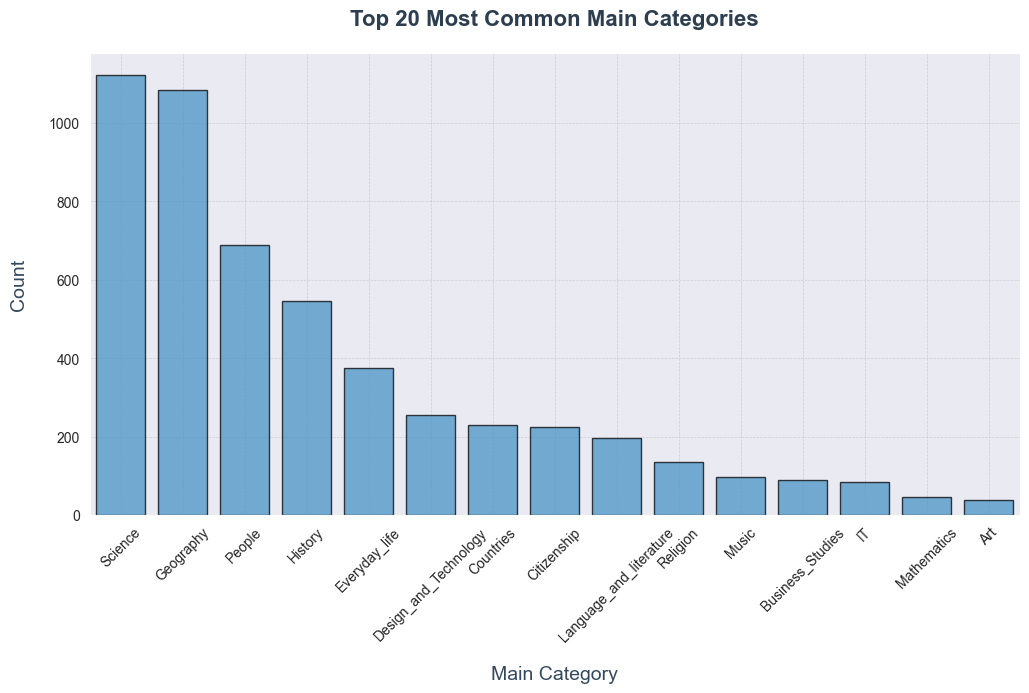

In [39]:
categories_exploded = article_df.explode('category')
categories_exploded['main_category'] = categories_exploded['category'].str.split('.').str[1]

# Here, we count the frequency of each main category
main_category_counts = categories_exploded['main_category'].value_counts()
top_20_main_categories = main_category_counts.head(20)


fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=top_20_main_categories.index, y=top_20_main_categories.values, ax=ax, color='#3498db', edgecolor='black', alpha=0.75)

ax.set_title("Top 20 Most Common Main Categories", fontsize=16, fontweight='bold', color='#2C3E50', pad=20)
ax.set_xlabel("Main Category", fontsize=14, color='#34495E', labelpad=15)
ax.set_ylabel("Count", fontsize=14, color='#34495E', labelpad=15)

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='#BDC3C7')
ax.tick_params(axis='x', rotation=45)

plt.show()

**Comment:**  From the above bar plot, we can observe the distribution of different categories in our dataset. Geography and science are the two most prominent categories, with a large number of articles, while art and mathematics are represented by relatively fewer articles. For further analysis it might be interesting to see what categories are the most present in the best ranked articles.

### Incoming hyperlinks

Here, we focus on the attribute "incoming hyperlinks", which represents how easily an article can be reached from other articles in the network that have a one-way hyperlink to it.

First, we look at the 10 articles with the most incoming hyperlinks :

Top 10 Most Linked-To Articles:
linkTarget
United_States       1551
United_Kingdom       972
France               959
Europe               933
England              751
World_War_II         751
Germany              743
India                611
English_language     598
London               587
Name: count, dtype: int64


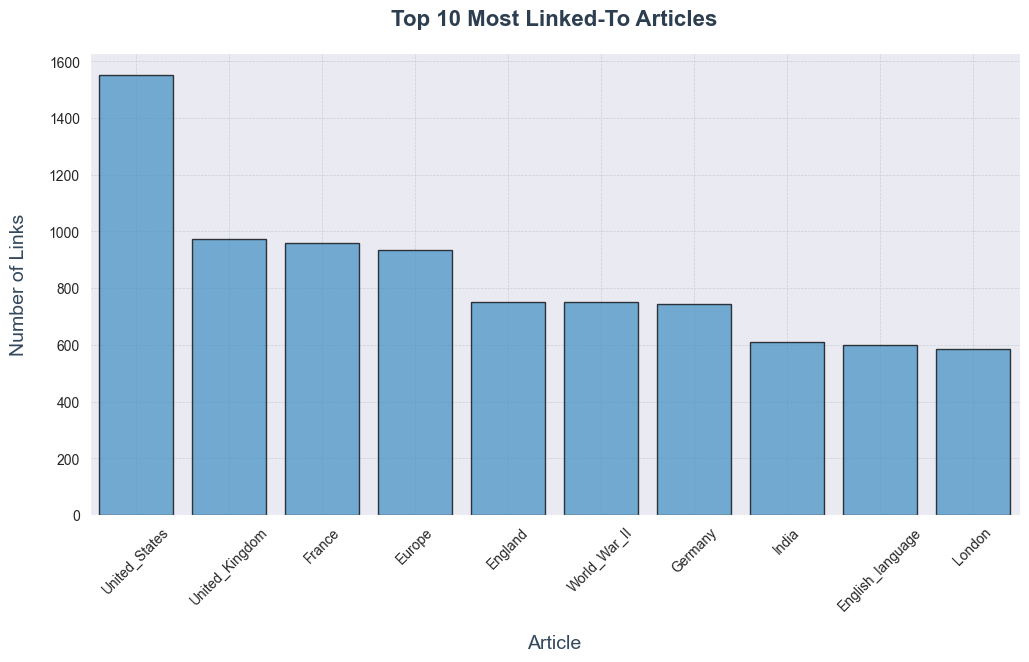

In [40]:
all_targets = article_df['linkTarget'].explode()

# Here, we count the occurrences of each target article
target_counts = all_targets.value_counts()

N = 10  
top_linked_articles = target_counts.head(N)

print(f"Top {N} Most Linked-To Articles:")
print(top_linked_articles)


fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=top_linked_articles.index, y=top_linked_articles.values, ax=ax, color='#3498db', edgecolor='black', alpha=0.75)

ax.set_title(f"Top {N} Most Linked-To Articles", fontsize=16, fontweight='bold', color='#2C3E50', pad=20)
ax.set_xlabel("Article", fontsize=14, color='#34495E', labelpad=15)
ax.set_ylabel("Number of Links", fontsize=14, color='#34495E', labelpad=15)

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='#BDC3C7')
ax.tick_params(axis='x', rotation=45)

plt.show()

**Comment:** Here, we can observe that almost all of the top-linked articles are related to geography. This could be explained by, as seen previously, Geography is one of the most prevalent categories in our data. Also, geographical locations are often linked to a wide range of subjects which also likely contributes to the higher number of incoming hyperlinks for these articles. 

Now we can look at the distribution of the number of incoming hyperlinks :

Summary statistics for incoming links:
count    4135.000000
mean       28.992019
std        65.560574
min         1.000000
25%         4.000000
50%        10.000000
75%        29.000000
max      1551.000000
Name: count, dtype: float64


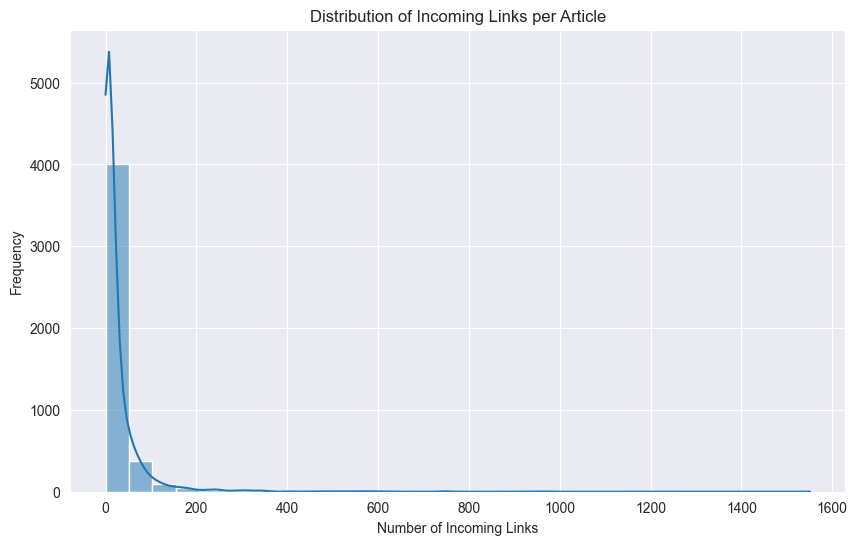

/Users/oscargoudet/.virtualenvs/ada-2024-project-adaholiks/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


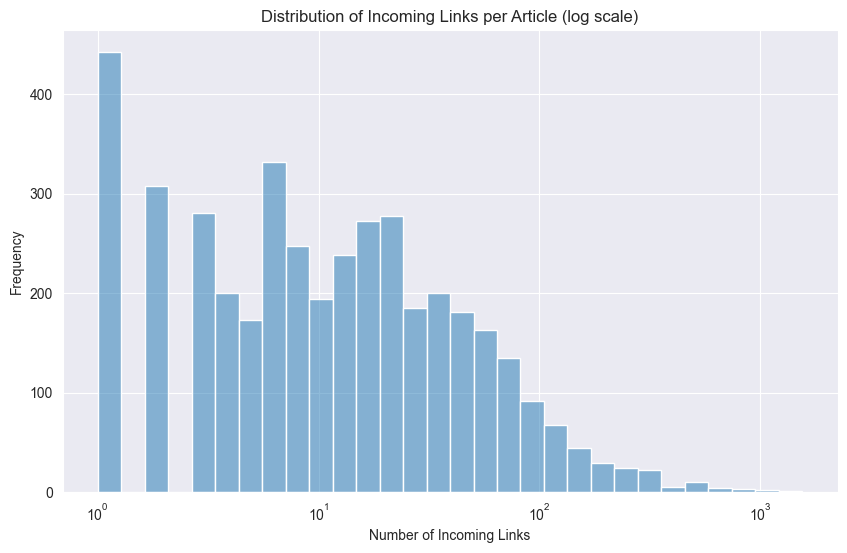

In [41]:
all_incoming_links = article_df['linkTarget'].explode()

incoming_link_counts = all_incoming_links.value_counts()

# Add the incoming link counts as a column in the DataFrame
# Initialize the column with 0 for all articles
article_df['incoming_links'] = article_df['article'].map(incoming_link_counts).fillna(0).astype(int)

print("Summary statistics for incoming links:")
print(incoming_link_counts.describe())

plt.figure(figsize=(10, 6))
sns.histplot(article_df['incoming_links'], bins=30, kde=True)
plt.title("Distribution of Incoming Links per Article")
plt.xlabel("Number of Incoming Links")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot the distribution of incoming links log scale for better visualization of the results
plt.figure(figsize=(10, 6))
sns.histplot(article_df['incoming_links'], bins=30, kde=True, log_scale=(True, False))
plt.title("Distribution of Incoming Links per Article (log scale)")
plt.xlabel("Number of Incoming Links")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


**Comment:** The distribution indicates that a small number of articles have a disproportionately large number of incoming links. compared to the rest of the network, these are the cenral hubs of the network ( e.g. United states article). With this heavy tail distribution we might think that it would be a good idea to filter out the outliers but in a systems like Wikispeedia (or any network), the heavy-tailed nature of link distributions is expected. Popular or highly connected articles likely play a central role in efficient navigation and removing any part of the distribution would skew our analysis and lead to biased results.



### Outgoing hyperlinks

Here, we focus on the attribute "outgoing hyperlinks", which represents how an article connects to other articles in the network through one-way hyperlinks.

First, we look at the 10 articles with the most outgoing hyperlinks :


Top 10 Articles with the Most Hyperlinks:
                                        article  num_hyperlinks
4297                              United_States             294
1247               Driving_on_the_left_or_right             255
2504                          List_of_countries             244
2503             List_of_circulating_currencies             236
2515                   List_of_sovereign_states             216
128                                      Africa             212
2505  List_of_countries_by_system_of_government             207
2433                                    Lebanon             192
2134                                   Interpol             191
340                                     Armenia             186


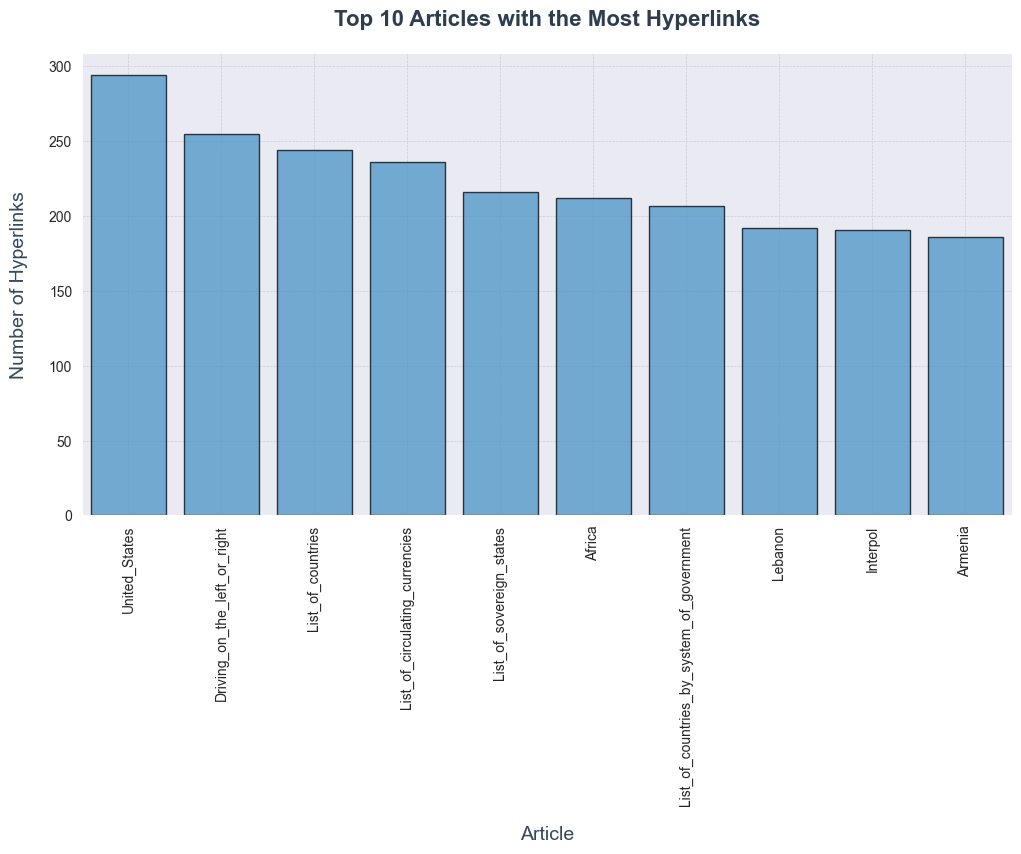

In [42]:
# Clean linkTarget column to replace the Nans by empty lists
article_df['linkTarget'] = article_df['linkTarget'].apply(
    lambda x: list(x) if isinstance(x, (list, np.ndarray)) else []
)

# Add a column with the number of hyperlinks in the article
article_df['num_hyperlinks'] = article_df['linkTarget'].apply(len)


top_hyperlinks = article_df.nlargest(10, 'num_hyperlinks')[['article', 'num_hyperlinks']]
print("\nTop 10 Articles with the Most Hyperlinks:")
print(top_hyperlinks)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=top_hyperlinks['article'], y=top_hyperlinks['num_hyperlinks'], ax=ax, color='#3498db', edgecolor='black', alpha=0.75)

ax.set_title("Top 10 Articles with the Most Hyperlinks", fontsize=16, fontweight='bold', color='#2C3E50', pad=20)
ax.set_xlabel("Article", fontsize=14, color='#34495E', labelpad=15)
ax.set_ylabel("Number of Hyperlinks", fontsize=14, color='#34495E', labelpad=15)

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='#BDC3C7')
ax.tick_params(axis='x', rotation=90)

plt.show()

**Comment:** It’s interesting to see that the "United States" article is the most important node in our network. This article consistently ranks highly across different measures. It often appears in the shortest paths between articles and is a common stop in players’ successful games. Because of this, it’s not surprising that it also has the highest number of both incoming and outgoing hyperlinks. We can also notice that some articles, like "List_of_countries," are mostly collections of hyperlinks. These types of articles act as hubs or directories with lots of outgoing hyperlinks, which is why they stand out when looking at hyperlink numbers. 

Now we can look at the distribution of the number of incoming hyperlinks :

Summary statistics for outgoing links:
count    4604.000000
mean       26.038662
std        24.201491
min         0.000000
25%        11.000000
50%        19.000000
75%        33.000000
max       294.000000
Name: num_hyperlinks, dtype: float64


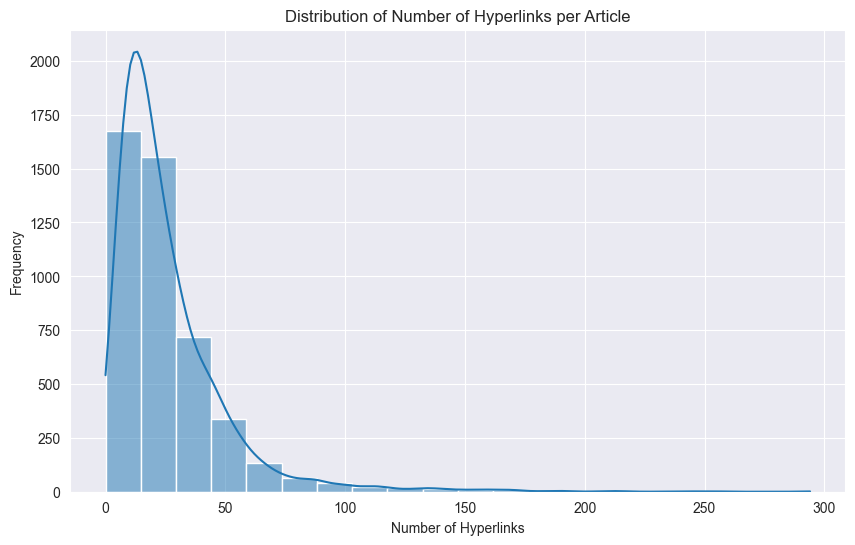

/Users/oscargoudet/.virtualenvs/ada-2024-project-adaholiks/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


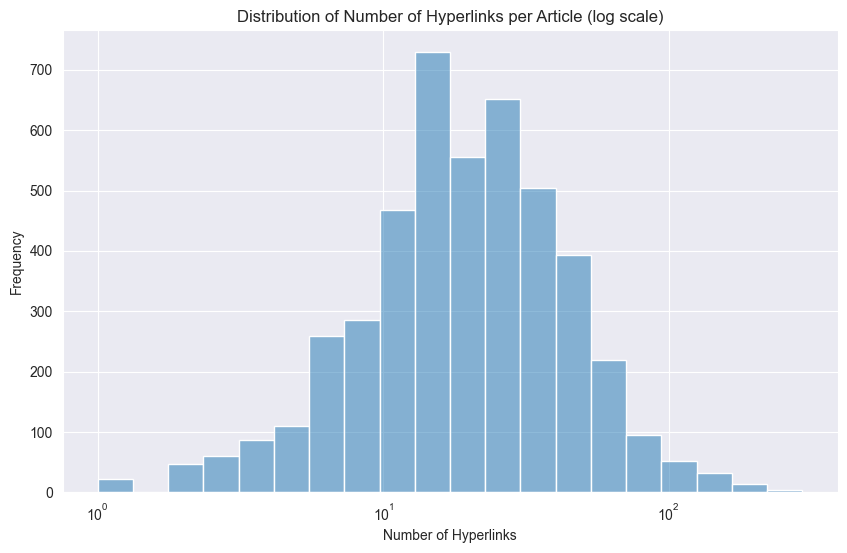

In [43]:
print("Summary statistics for outgoing links:")
print(article_df['num_hyperlinks'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(article_df['num_hyperlinks'], bins=20, kde=True)
plt.title("Distribution of Number of Hyperlinks per Article")
plt.xlabel("Number of Hyperlinks")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot the distribution of the number of hyperlinks log scale for better visualisation
plt.figure(figsize=(10, 6))
sns.histplot(article_df['num_hyperlinks'], bins=20, kde=True, log_scale=(True, False) )
plt.title("Distribution of Number of Hyperlinks per Article (log scale)")
plt.xlabel("Number of Hyperlinks")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Comment:** The summary statistics and the above distribution reveal that the number of outgoing links varies widely across articles. Most articles have between 11 and 33 outgoing links. However, the mean of 26 and the standard deviation (24.2) indicate that some articles have significantly more links, as highlighted by the maximum of 294, again highlighting disproportionnality of number of links per article. 

### Hyperlink density

Here, we now focus on the attribute "hyperlink density", which combines the length of an article with the number of outgoing hyperlinks it pocesses.

First, we look at the 10 articles with the highest hyperlink density :


Top 10 Articles by Hyperlink Density:
                                                article  hyperlink_density
2493                         List_of_European_countries           0.025199
2488                          List_of_African_countries           0.024315
2490                            List_of_Asian_countries           0.023562
2496                         List_of_Oceanian_countries           0.022334
2495                   List_of_North_American_countries           0.019239
2134                                           Interpol           0.017781
3020                                   Northwest_Africa           0.017121
2505          List_of_countries_by_system_of_government           0.016477
2509  List_of_members_of_the_Commonwealth_of_Nations...           0.013772
2503                     List_of_circulating_currencies           0.012900


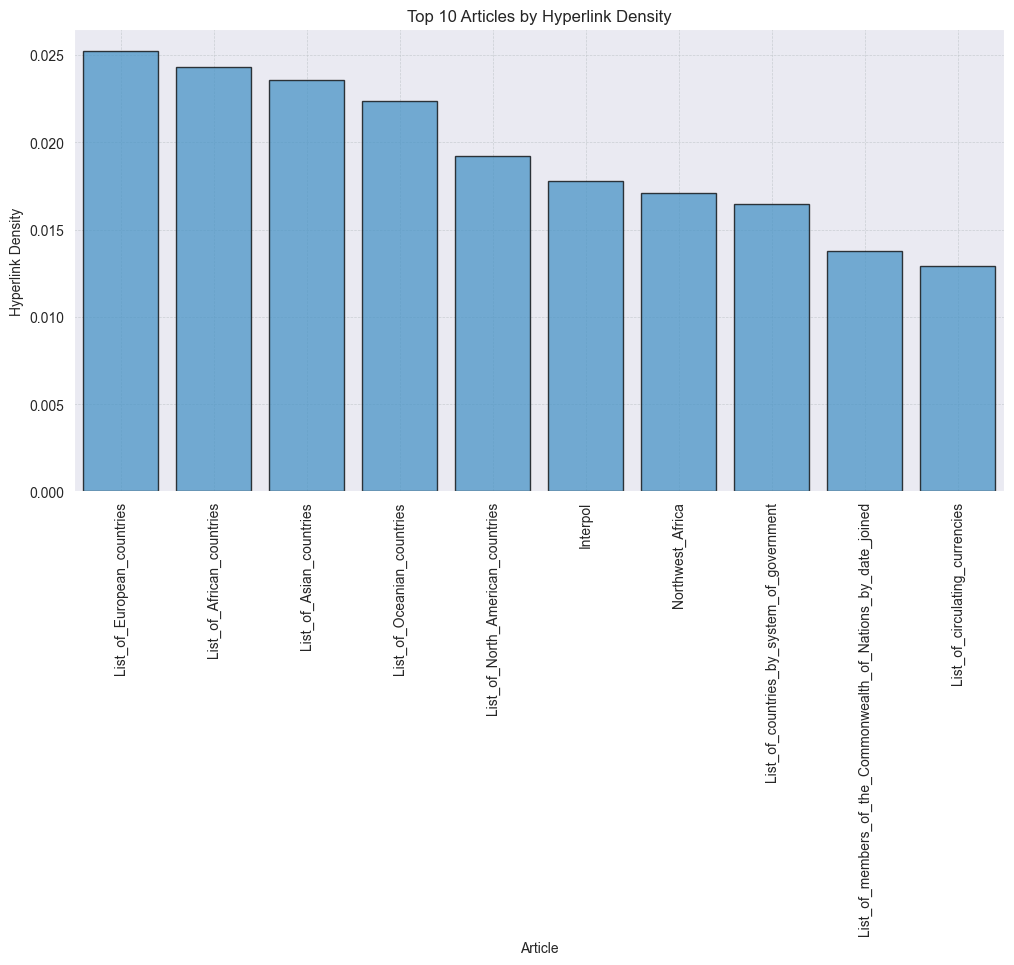

In [44]:
# Ensure plain_text is a string and handle missing values
article_df['plain_text'] = article_df['plain_text'].fillna("").astype(str)

# Calculate the number of characters in the plain_text column
article_df['num_characters'] = article_df['plain_text'].apply(len)

# Calculate hyperlink density (num_hyperlinks / num_characters)
# Avoid division by zero by setting density to 0 if num_characters is 0
article_df['hyperlink_density'] = article_df.apply(
    lambda row: row['num_hyperlinks'] / row['num_characters'] if row['num_characters'] > 0 else 0,
    axis=1
)

# Identify articles with the highest hyperlink density
top_hyperlink_density = article_df.sort_values(by='hyperlink_density', ascending=False).head(10)
print("\nTop 10 Articles by Hyperlink Density:")
print(top_hyperlink_density[['article', 'hyperlink_density']])


plt.figure(figsize=(12, 6))
sns.barplot(x=top_hyperlink_density['article'], y=top_hyperlink_density['hyperlink_density'], color='#3498db', edgecolor='black', alpha=0.75)
plt.xticks(rotation=90)
plt.title("Top 10 Articles by Hyperlink Density")
plt.xlabel("Article")
plt.ylabel("Hyperlink Density")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='#BDC3C7')
plt.show()

**Comment:** We can see that all the articles with the highest hyperlink density are "List" articles. This makes sense, as these articles contain very little text, and nearly every item in the list is a hyperlink to another article. However, this suggests that hyperlink density might not be a reliable indicator of an article’s quality for efficient navigation.


Now we can look at the distribution of hyperlink density :

Summary statistics for hyperlink density:
count    4604.000000
mean        0.001604
std         0.001573
min         0.000000
25%         0.000727
50%         0.001208
75%         0.001953
max         0.025199
Name: hyperlink_density, dtype: float64


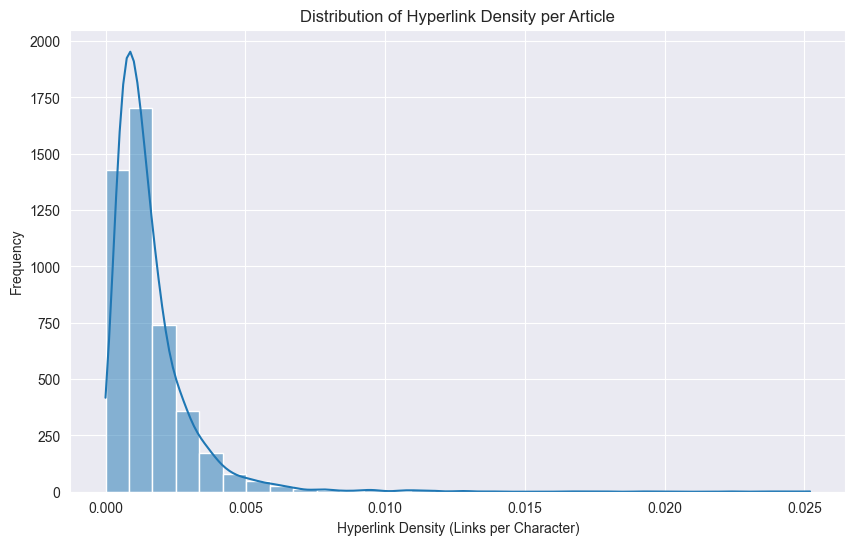

/Users/oscargoudet/.virtualenvs/ada-2024-project-adaholiks/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


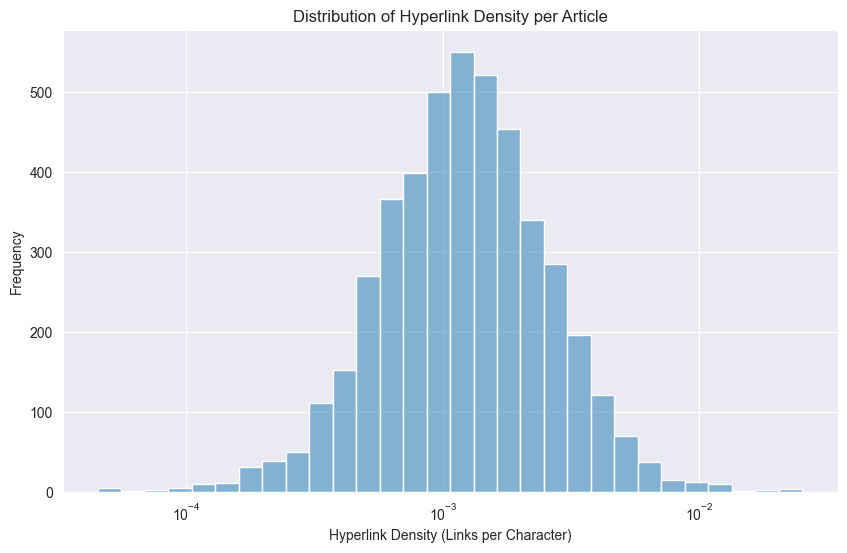

In [45]:
# Summary statistics of hyperlink density
print("Summary statistics for hyperlink density:")
print(article_df['hyperlink_density'].describe())

# Plot the distribution of hyperlink density
plt.figure(figsize=(10, 6))
sns.histplot(article_df['hyperlink_density'], bins=30, kde=True)
plt.title("Distribution of Hyperlink Density per Article")
plt.xlabel("Hyperlink Density (Links per Character)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot the distribution of hyperlink density log scale
plt.figure(figsize=(10, 6))
sns.histplot(article_df['hyperlink_density'], bins=30, kde=True, log_scale=(True, False) )
plt.title("Distribution of Hyperlink Density per Article")
plt.xlabel("Hyperlink Density (Links per Character)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Comment:** Here we can see the hyperlink density in the graph follows again a log normal distribution which could again be expected in a network

### Number of characters

Finally, we focus on the attribute "number of characters", which is an indication of the length of each article.


Top 10 Articles by Number of Characters:
                 article  num_characters
734     Byzantine_Empire          108718
4542        World_War_II          101666
4066       The_Holocaust          100238
1453       Extinct_birds           94934
2108  Indo-Greek_Kingdom           91676
2445        Leon_Trotsky           91306
4363         Vietnam_War           90550
1821               Guqin           87886
1369       Elvis_Presley           87815
1012    Condoleezza_Rice           85726


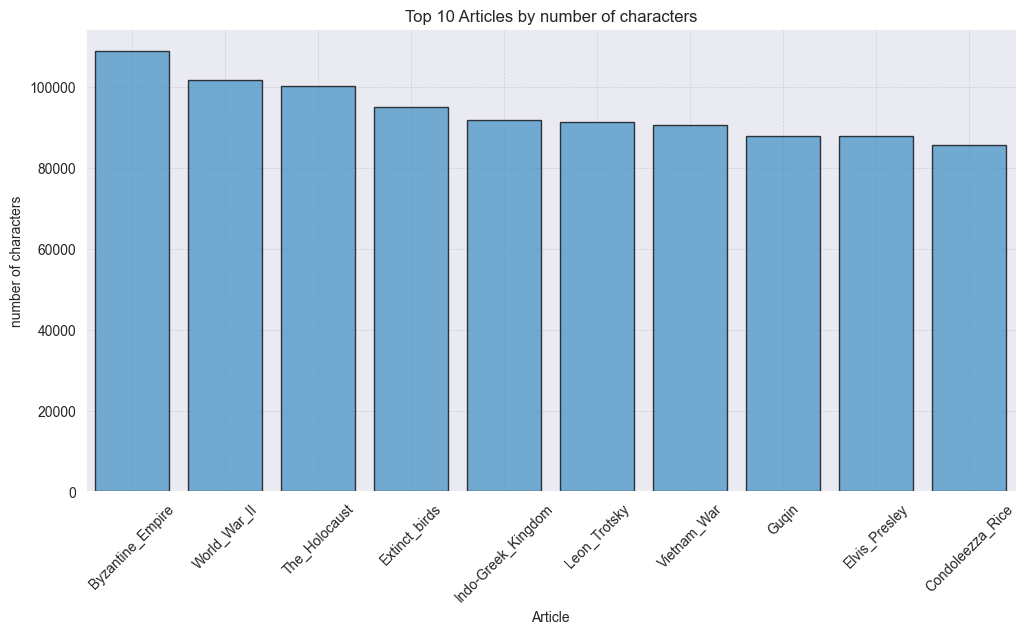

In [46]:
top_characters = article_df.sort_values(by='num_characters', ascending=False).head(10)
print("\nTop 10 Articles by Number of Characters:")
print(top_characters[['article', 'num_characters']])

plt.figure(figsize=(12, 6))
sns.barplot(x=top_characters['article'], y=top_characters['num_characters'], color='#3498db', edgecolor='black', alpha=0.75)
plt.xticks(rotation=45)
plt.title("Top 10 Articles by number of characters")
plt.xlabel("Article")
plt.ylabel("number of characters")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='#BDC3C7')
plt.show()

**Comment:** The top 10 articles with the highest letter count are dominated by historical events, likely because these events are long, well-documented, and contain a lot of information. In addition to historical events, three of the articles are biographical, indicating that articles about people can also have a high letter count which could be due to the detailed nature of their life histories leading to long articles.


Summary statistics for number of characters:
count      4604.000000
mean      21232.968723
std       15508.639317
min         828.000000
25%        8811.750000
50%       17736.500000
75%       30104.750000
max      108718.000000
Name: num_characters, dtype: float64


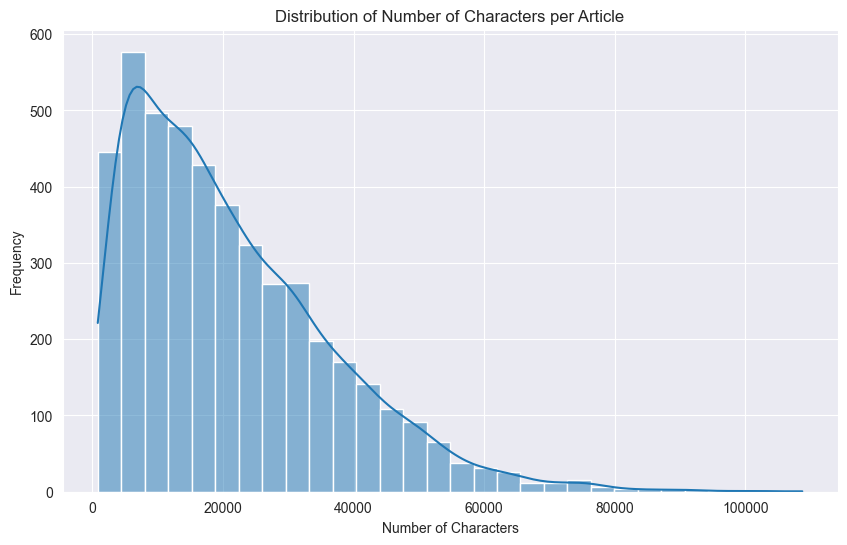

In [47]:
print("\nSummary statistics for number of characters:")
print(article_df['num_characters'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(article_df['num_characters'], bins=30, kde=True)
plt.title("Distribution of Number of Characters per Article")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Comment:** Most articles range between 8'000 and 30'000 characters, with a slight right skew due to a few very long articles, indicating considerable variation in article lengths.

In [48]:
#article_df.to_feather('Data/dataframes/article_df_features.feather')

## Exploration of semantic distances between articles

### Semantic Similarity

We can compute basic semantic distance on articles simply by creating embeddings for the titles of the articles. In P3, we can expand this to calculate embeddings using full article text. 

### Computing the Embeddings

First, let's compute the embeddings. We can follow a HuggingFace tutorial on generating text embeddings. This tutorial is found [here](https://huggingface.co/blog/getting-started-with-embeddings). For each title, we will generate an embedding, and store it in our dataframe.

In [49]:
article_names = articles['article']

# Here fetch a token from hugging face website
# https://huggingface.co/blog/getting-started-with-embeddings
model_id = "sentence-transformers/all-MiniLM-L6-v2"
hf_token = "insert token here"

api_url = f"https://api-inference.huggingface.co/pipeline/feature-extraction/{model_id}"
headers = {"Authorization": f"Bearer {hf_token}"}

KeyError: 'article'

In [ ]:
def query(texts):
    response = requests.post(api_url, headers=headers, json={"inputs": texts, "options":{"wait_for_model":True}})
    return response.json()

article_names_list = article_names.tolist()

#replace _ with space in article names
article_names_list = [name.replace("_", " ") for name in article_names_list]

output = query(article_names_list)

articles['embeddings'] = output

articles.to_feather('Data/dataframes/article_dataframe_with_embeddings.feather')

### Analyzing the Embeddings

There are lots of tools to visualize and analyze embeddings. In order to extract meaningful representations, a common tactic is to reduce the dimensionality of the embeddings. The two main tools for this are PCA and T-SNE. 
See [here](https://distill.pub/2016/misread-tsne/) for a great overview on T-SNE.
We can use both of these via scikit-learn. For now, we just want to get a feel for the data. Let's use tensorflow's Embedding Projector tool. This tool can be hosted locally or used in a browser. 

#### Embedding Projector

Embedding Projector is a useful tool made by TF to look at word embedding spaces. Let's save our data so it can be opened there.

https://projector.tensorflow.org/

Note that the embedding projector can also be used locally.

In [ ]:
# Here uncomment the code oônce a token is used to see our results

# Separate embeddings as a new DataFrame
#embeddings_df = pd.DataFrame(articles['embeddings'].tolist())

# Save embeddings to TSV
#embeddings_df.to_csv('Data/embeddings/embeddings.tsv', sep='\t', header=False, index=False)

# Save metadata to TSV
#metadata_df = articles[['article']]
#metadata_df.to_csv('metadata.tsv', sep='\t', header=False, index=False)

#articles[articles['article'] == 'Code_of_Hammurabi']

In [ ]:
# Taken from OpenAI's tutorial on embeddings

#matrix = np.array(articles['embeddings'].tolist())

# Create a t-SNE model and transform the data
#tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
#vis_dims = tsne.fit_transform(matrix)

#colors = ["red", "darkorange", "gold", "turquiose", "darkgreen"]
#x = [x for x,y in vis_dims]
#y = [y for x,y in vis_dims]
# color_indices = df.Score.values - 1

#colormap = matplotlib.colors.ListedColormap(colors)
#plt.scatter(x, y, cmap=colormap, alpha=0.3)
#plt.title("Article Names visualized using t-SNE")

### TF's Embedding Projector

After saving our embeddings and their required metadata according to EmbeddingProjector's specifications, we can load the data into the tool. For now, let's use T-SNE in order to group the data. Here is what the data looks like after 1000 iterations of T-SNE:

![Default projections](Figures/default_1000_tsne.png)

But . . . does it even work? Well, let's do a gut check. What is that clump of titles at the top?

![Tropical Storms](Figures/tropical_storms.png)

Interesting! It seems like tropical storms are on a level of their own! That is, they share semantic meaning with each other but not other titles.Let's look at some common according to our statistics. For example, what is close to the United States?

![US TSNE](Figures/UnitedStates_TSNE.png)

We can also see what is close to the `United_States` title in the original, unprojected space. Cosine and Euclidean distance are both easily implementable in python, and already exist in multiple packages like scikit-learn.

![US Nearest](Figures/US_Nearest.png)

This Euclidean/Cosine distance will serve as our metric for semantic distance.

**END OF PREPROCESSING & exploratory data analysis**

## Store cosine distance of title embeddings of link target

In [ ]:
from scipy.spatial.distance import cosine



# Part 2 : graph theory based top articles

**Comment:** In this analysis, we have divided the count by the total number of shortest paths for each source-target pair. This normalization helps us measure the true importance of each article in the network. Without normalization, an article that appears in every shortest path for a specific source-target pair might seem highly important, even if it doesn’t play a critical role across the entire network. By normalizing, we avoid overemphasizing articles that are only crucial within specific source-target pairs and ensure that the count more accurately reflects an article’s overall significance in the network.

$$
\text{Article k's Importance in (i ; j)} = \frac{A_{k}^{(i,j)}}{P^{(i,j)}}
$$

where:

$$
\begin{aligned}
A_{k}^{(i,j)} &= \text{Number of times article } k \text{ appears in shortest paths between source } i \text{ and target } j, \\
P^{(i,j)} &= \text{Total number of shortest paths between } i \text{ and } j.
\end{aligned}
$$



In [ ]:

paths_finished['finished'] = True
paths_finished['failure_reason'] = None

paths_finished['start_article'] = paths_finished['path'].apply(lambda x: x.split(';')[0])
paths_finished['target_article'] = paths_finished['path'].apply(lambda x: x.split(';')[-1])


paths_unfinished['finished'] = False

paths_unfinished.rename(columns={'type': 'failure_reason', 'target' : 'target_article'}, inplace=True)

paths_unfinished['start_article'] = paths_unfinished['path'].apply(lambda x: x.split(';')[0])

paths = pd.concat([paths_finished, paths_unfinished])

finished_paths = paths[paths['finished'] == True]

unique_pairs = finished_paths[['start_article', 'target_article']].drop_duplicates()

pair_counts = finished_paths.groupby(['start_article', 'target_article']).size().reset_index(name='count')

#pair_counts

**Comment:** We also decided to concentrate our analysis on source-target pairs that are actually used in the game. By focusing only on these pairs, we generate a final list of articles that are theoretically advantageous for all possible gameplay scenarios. This approach prevents the inclusion of articles that may appear to be effective in connecting pairs not relevant to the game, which could otherwise skew the analysis.

In [ ]:
from collections import defaultdict

node_counts = defaultdict(int)

errors = 0

all_nb_of_shortest_paths = []

for _, row in pair_counts.iterrows():
    source = row['start_article']
    target = row['target_article']

    try:

        all_paths = list(nx.all_shortest_paths(G, source=source, target=target))

        nb_of_shortest_paths = len(all_paths)

        all_nb_of_shortest_paths.append(nb_of_shortest_paths)
        
        for path in all_paths:
            for node in path:
                if node != source and node != target:
                    node_counts[node] += 1/nb_of_shortest_paths

    except nx.NetworkXNoPath:
        # Skip this source-target pair if no path exists
        errors +=1


node_counts_df = pd.DataFrame(node_counts.items(), columns=['Node', 'ShortestPathCount'])

### Results

In [ ]:
# Sort by the 'ShortestPathCount' column in ascending order
node_counts_df = node_counts_df.sort_values(by='ShortestPathCount', ascending=False)
node_counts_df.head(20)

,Node,ShortestPathCount
27,United_States,2778.997827
124,United_Kingdom,1128.250118
77,Europe,809.943234
79,England,746.721314
174,Africa,716.774062
2,Germany,614.765519
92,World_War_II,534.374375
230,Japan,526.817727
143,Earth,480.186276
1,France,417.042087


**Comment:** Here, we display the first 20 articles identified as most important across the network. These articles are ranked based on their normalized shortest path count, highlighting those that play a critical role in connecting various parts of the network. We can notice that topics related to influential countries (like the United States and the United Kingdom), broad regions (such as Europe and Africa), and significant historical events (like World War II) are among the highest-ranked. This suggests that geopolitical, regional, and historical themes are central to the network's structure, serving as key connectors across diverse topics.

In [ ]:
node_counts_df['ShortestPathCount'].describe()

count    3735.000000
mean       13.928782
std        63.764178
min         0.003125
25%         0.506233
50%         2.513890
75%         9.294983
max      2778.997827
Name: ShortestPathCount, dtype: float64

**Comment:** 
- *Count :* Here, we see that 3'735 out of 4'604 articles are active nodes in the games network, representing about 81% of the total. This suggests that the majority of articles contribute to the games network's connectivity, while the remaining 19% may be more isolated or peripheral.
- *Mean :* The mean suggests most articles are not very important based on our metric. The quantiles support this, with the 25th and 50th percentiles showing that most articles appear in only a few shortest paths. A small number of articles are highly central, indicating a long-tailed distribution where a few nodes dominate the network.

# Part 4 : Analysis of the results found and correlation with attributes

Here we will study the correlation between our article atributes and the ranking metrics that we came up with, but the results we observe must be treated with caution as at the moment the ranking is still quite arbitrary and we will need further analysis to determine which articles can really be considered as good in navigation path.

In [ ]:
# This is the next step
article_df

,article,article_unrendered_unicode,category,linkSource,linkTarget,distances,plain_text,incoming_links,num_hyperlinks,num_characters,hyperlink_density
0,Áedán_mac_Gabráin,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,[subject.History.British_History.British_Histo...,Áedán_mac_Gabráin,"[Bede, Columba, Dál_Riata, Great_Britain, Irel...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nÁedán mac Gabráin\n\n2007 Sch...,0,11,11612,0.000947
1,Åland,%C3%85land,"[subject.Countries, subject.Geography.European...",Åland,"[20th_century, Baltic_Sea, Crimean_War, Curren...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nÅland\n\n2007 Schools Wikiped...,0,19,17238,0.001102
2,Édouard_Manet,%C3%89douard_Manet,[subject.People.Artists],Édouard_Manet,"[Absinthe, Beer, Claude_Monet, Diego_Velázquez...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nÉdouard Manet\n\n2007 Schools...,0,20,18996,0.001053
3,Éire,%C3%89ire,"[subject.Countries, subject.Geography.European...",Éire,"[Canada, English_language, George_VI_of_the_Un...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nÉire\n\n2007 Schools Wikipedi...,0,8,13083,0.000611
4,Óengus_I_of_the_Picts,%C3%93engus_I_of_the_Picts,[subject.History.British_History.British_Histo...,Óengus_I_of_the_Picts,"[Dál_Riata, Durham, England, Great_Britain, Ir...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nÓengus I of the Picts\n\n2007...,0,10,12944,0.000773
...,...,...,...,...,...,...,...,...,...,...,...
4599,Zionism,Zionism,"[subject.People.Political_People, subject.Reli...",Zionism,"[18th_century, 19th_century, Adolf_Hitler, Alb...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nZionism\n\n2007 Schools Wikip...,25,74,62086,0.001192
4600,Zirconium,Zirconium,[subject.Science.Chemistry.Chemical_elements],Zirconium,"[Aluminium, Arabic_language, Australia, Bicycl...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nZirconium\n\n2007 Schools Wik...,15,42,13253,0.003169
4601,Zoroaster,Zoroaster,[subject.People.Religious_figures_and_leaders],Zoroaster,"[18th_century, 9th_century, Afghanistan, Age_o...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nZoroaster\n\n2007 Schools Wik...,9,28,19726,0.001419
4602,Zuid-Gelders,Zuid-Gelders,"[subject.Geography.European_Geography, subject...",Zuid-Gelders,"[Brabantian, Dutch_language, East_Flemish, Hol...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nZuid-Gelders\n\n2007 Schools ...,5,5,2341,0.002136


In [ ]:
article_weightes_sum_df2

,n_appearances,weighted_sum
article_name,,
United_States,4534,250.496601
Africa,1364,41.240760
World_War_II,1104,38.328713
Japan,484,28.509294
Germany,811,27.682282
...,...,...
Great_Britain,297,-23.702013
European_Union,431,-24.659206
Continent,305,-28.221520


In [ ]:
# Rename column for alignment
article_weightes_sum_df2 = article_weightes_sum_df2.reset_index()
article_weightes_sum_df2 = article_weightes_sum_df2.rename(columns={'article_name': 'article'})
# Merge the two DataFrames on 'article'
combined_df = pd.merge(article_df, article_weightes_sum_df2, on='article', how='inner')

Correlation between weighted_sum ranking and ranks of each metric:
rank_incoming_links       0.058198
rank_num_hyperlinks       0.189670
rank_num_characters       0.249091
rank_hyperlink_density   -0.044697
dtype: float64


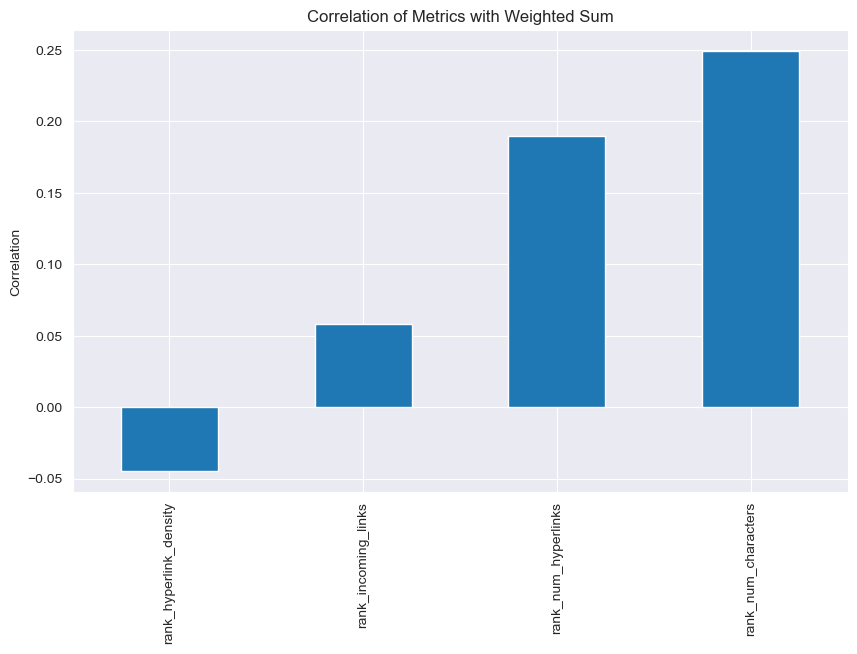

In [ ]:
# Rank articles for each metric
combined_df['rank_incoming_links'] = combined_df['incoming_links'].rank(ascending=False)
combined_df['rank_num_hyperlinks'] = combined_df['num_hyperlinks'].rank(ascending=False)
combined_df['rank_num_characters'] = combined_df['num_characters'].rank(ascending=False)
combined_df['rank_hyperlink_density'] = combined_df['hyperlink_density'].rank(ascending=False)
combined_df['rank_weighted_sum'] = combined_df['weighted_sum'].rank(ascending=False)

# Compute correlations between ranks and weighted_sum
correlations = combined_df[
    ['rank_incoming_links', 'rank_num_hyperlinks', 'rank_num_characters', 'rank_hyperlink_density']
].corrwith(combined_df['rank_weighted_sum'])

# Display correlation results
print("Correlation between weighted_sum ranking and ranks of each metric:")
print(correlations)

# Visualize correlations
import matplotlib.pyplot as plt
correlations.sort_values().plot(kind='bar', figsize=(10, 6), title="Correlation of Metrics with Weighted Sum")
plt.ylabel("Correlation")
plt.show()

Interestingly the attribute of article that is the most strongly correlated to the weighted sum ranking of articles is the length of the article, also the hyperlink density is negatively correlated with the weighted sum ranking supposing that having very dense articles might loose the players and lead them to a suboptimal navigation.